# Part I - (PISA Dataset Exploration)
## by (Hanan H. Hasan)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [159]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

> To load the datasets of the dictionary of titles and the whole dataset:


Since the file is very big and my local nor udacity cloud did not open it fluently, I have taken sample of 1000 rows randomly. then I did save it and work with this sampled dataset locally. I have commented out all the steps that are taken but not needed for clarification of what has been done.

In [160]:
# import chardet

# # Detect the encoding of the file
# with open('pisa2012.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(10000))

# # Read the CSV file using the detected encoding
# df = pd.read_csv('pisa2012.csv', encoding='latin-1')


In [161]:
# #As Dataframe is really big and difficult to handle on jupyter, I take random samples.

# dfsampled = pd.DataFrame()

# dfsampled = df.sample(n=1000, random_state=42) 

# dfsampled.to_csv('dfsamplednew.csv',index=False)

In [162]:
dfdict = pd.read_csv('pisadict2012.csv', encoding = 'latin-1')

In [163]:
dfsampled = pd.read_csv('dfsamplednew.csv')
dfsampled.head()

Unnamed: 0        CNT  SUBNATIO  STRATUM      OECD                 NC  \
0       53430   Bulgaria   1000000  BGR0008  Non-OECD          Bulgaria    
1       74682     Canada   1240000  CAN0872      OECD            Canada    
2      293694      Korea   4100000  KOR0302      OECD  Republic of Korea   
3       26242  Australia    360000  AUS0307      OECD          Australia   
4      114397   Colombia   1700000  COL0404  Non-OECD          Colombia    

   SCHOOLID  STIDSTD  ST01Q01  ST02Q01  ST03Q01  ST03Q02 ST04Q01  \
0       122     3446        9      4.0       12     1996  Female   
1         9      212       10      2.0       11     1996    Male   
2        89     2834       10      2.0        9     1996    Male   
3       221     4091       10      1.0        5     1996  Female   
4        12      298        8      1.0        8     1996  Female   

                       ST05Q01  ST06Q01             ST07Q01  \
0                          NaN      7.0           No, never   
1   Yes, for one year or less       6.0           No, never   
2  Yes, for more than one year      7.0           No, never   
3   Yes, for one year or less       6.0           No, never   
4   Yes, for one year or less       6.0  Yes, twice or more   

              ST07Q02    ST07Q03                ST08Q01  \
0           No, never  No, never                 None     
1           No, never  No, never   Five or more times     
2           No, never  No, never  Three or four times     
3           No, never  No, never                 None     
4  Yes, twice or more        NaN                 None     

                 ST09Q01  ST115Q01 ST11Q01 ST11Q02 ST11Q03 ST11Q04 ST11Q05  \
0                 None         1.0     Yes     Yes     NaN     NaN     NaN   
1  Three or four times         2.0      No     Yes     Yes     Yes      No   
2                 None         1.0     Yes     Yes     NaN     NaN     NaN   
3                 None         1.0     Yes     Yes     Yes      No      No   
4                 None         1.0     Yes     Yes      No     Yes      No   

  ST11Q06                                ST13Q01 ST14Q01 ST14Q02 ST14Q03  \
0     NaN                                    NaN     NaN     NaN     NaN   
1      No                      <ISCED level 3A>      NaN     NaN     NaN   
2     NaN                      <ISCED level 3A>       No      No      No   
3      No                      <ISCED level 3A>       No      No      No   
4      No  She did not complete <ISCED level 1>       No      No      No   

  ST14Q04                             ST15Q01                ST17Q01 ST18Q01  \
0     NaN                                 NaN                    NaN     NaN   
1     NaN                                 NaN      <ISCED level 3A>       No   
2     NaN  Other (e.g. home duties, retired)   <ISCED level 3B, 3C>       No   
3      No                                 NaN      <ISCED level 3A>       No   
4     NaN  Other (e.g. home duties, retired)        <ISCED level 2>       No   

  ST18Q02 ST18Q03 ST18Q04                             ST19Q01  \
0     NaN     NaN     NaN                                 NaN   
1     Yes     Yes      No        Working full-time <for pay>    
2      No      No     NaN  Other (e.g. home duties, retired)    
3      No      No      No        Working full-time <for pay>    
4      No      No     NaN        Working full-time <for pay>    

           ST20Q01          ST20Q02          ST20Q03  ST21Q01  \
0  Country of test  Country of test  Country of test      NaN   
1  Country of test  Country of test  Country of test      NaN   
2  Country of test  Country of test  Country of test      NaN   
3  Country of test  Country of test    Other country      NaN   
4    Other country  Country of test    Other country      1.0   

                ST25Q01 ST26Q01 ST26Q02 ST26Q03 ST26Q04 ST26Q05 ST26Q06  \
0  Language of the test     Yes     Yes     NaN     Yes     NaN     Yes   
1  Language of the test      No     Yes     Yes     Yes     Yes 

In [164]:
dfdict.head()

Unnamed: 0  \
0        CNT   
1   SUBNATIO   
2    STRATUM   
3       OECD   
4         NC   

                                                                                          x  
0                                                                  Country code 3-character  
1  Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)  
2                            Stratum ID 7-character (cnt + region ID + original stratum ID)  
3                                                                              OECD country  
4                                                              National Centre 6-digit Code

> Now, since the column naming is not easy to comprehend, I will rename them according to the titles given in the dfdict. 


In [165]:
# Rename the columns and set the codes as key:
dfchangeddic = dfdict.rename(columns={'Unnamed: 0': 'code', 'x': 'title'})

In [166]:
# Convert it to dictionary:
dic = dfchangeddic.set_index('code')['title'].to_dict()

In [167]:
#Rename the database column names: 
df_renamed = dfsampled.rename(columns=dic)
df_renamed.head()

Unnamed: 0 Country code 3-character  \
0       53430                 Bulgaria   
1       74682                   Canada   
2      293694                    Korea   
3       26242                Australia   
4      114397                 Colombia   

   Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)  \
0                                                                                   1000000   
1                                                                                   1240000   
2                                                                                   4100000   
3                                                                                    360000   
4                                                                                   1700000   

  Stratum ID 7-character (cnt + region ID + original stratum ID) OECD country  \
0                                                        BGR0008     Non-OECD   
1                                                        CAN0872         OECD   
2                                                        KOR0302         OECD   
3                                                        AUS0307         OECD   
4                                                        COL0404     Non-OECD   

  National Centre 6-digit Code  \
0                    Bulgaria    
1                      Canada    
2            Republic of Korea   
3                    Australia   
4                    Colombia    

   School ID 7-digit (region ID + stratum ID + 3-digit school ID)  Student ID  \
0                                                             122        3446   
1                                                               9         212   
2                                                              89        2834   
3                                                             221        4091   
4                                                              12         298   

   International Grade  National Study Programme  Birth - Month  Birth -Year  \
0                    9                       4.0             12         1996   
1                   10                       2.0             11         1996   
2                   10                       2.0              9         1996   
3                   10                       1.0              5         1996   
4                    8                       1.0              8         1996   

   Gender             Attend <ISCED 0>  Age at <ISCED 1>  Repeat - <ISCED 1>  \
0  Female                          NaN               7.0           No, never   
1    Male   Yes, for one year or less                6.0           No, never   
2    Male  Yes, for more than one year               7.0           No, never   
3  Female   Yes, for one year or less                6.0           No, never   
4  Female   Yes, for one year or less                6.0  Yes, twice or more   

   Repeat - <ISCED 2> Repeat - <ISCED 3> Truancy - Late for School  \
0           No, never          No, never                    None     
1           No, never          No, never      Five or more times     
2           No, never          No, never     Three or four times     
3           No, never          No, never                    None     
4  Yes, twice or more                NaN                    None     

  Truancy - Skip whole school day  Truancy - Skip classes within school day  \
0                          None                                         1.0   
1           Three or four times                                         2.0   
2                          None                                         1.0   
3                          None                                         1.0   
4                          None                                         1.0   

  At Home - Mother At Home - Father At Home - Brothers At Home - Sisters  \
0              Yes              Yes                NaN            

In [168]:
# Rename to simplify and clarify more:
prepared = df_renamed.rename(columns={'Unnamed: 0': 'id'})

In [169]:
prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 636 entries, id to Date of the database creation
dtypes: float64(250), int64(18), object(368)
memory usage: 48.5+ MB


In [170]:
prepared.dtypes

id                                                                                            int64
Country code 3-character                                                                     object
Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)      int64
Stratum ID 7-character (cnt + region ID + original stratum ID)                               object
OECD country                                                                                 object
                                                                                             ...   
FINAL STUDENT REPLICATE BRR-FAY WEIGHT80                                                    float64
RANDOMIZED FINAL VARIANCE STRATUM (1-80)                                                      int64
RANDOMLY ASSIGNED VARIANCE UNIT                                                               int64
Senate weight - sum of weight within the country is 1000                                    float64


In [171]:
prepared

id Country code 3-character  \
0      53430                 Bulgaria   
1      74682                   Canada   
2     293694                    Korea   
3      26242                Australia   
4     114397                 Colombia   
...      ...                      ...   
9995  243027                    Italy   
9996  355783                 Malaysia   
9997   23415                Australia   
9998  396832                    Qatar   
9999  245090                    Italy   

      Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)  \
0                                                                                      1000000   
1                                                                                      1240000   
2                                                                                      4100000   
3                                                                                       360000   
4                                                                                      1700000   
...                                                                                        ...   
9995                                                                                   3800000   
9996                                                                                   4580000   
9997                                                                                    360000   
9998                                                                                   6340000   
9999                                                                                   3800000   

     Stratum ID 7-character (cnt + region ID + original stratum ID)  \
0                                                           BGR0008   
1                                                           CAN0872   
2                                                           KOR0302   
3                                                           AUS0307   
4                                                           COL0404   
...                                                             ...   
9995                                                        ITA1301   
9996                                                        MYS0202   
9997                                                        AUS0720   
9998                                                        QAT0004   
9999                                                        ITA0501   

     OECD country National Centre 6-digit Code  \
0        Non-OECD                    Bulgaria    
1            OECD                      Canada    
2            OECD            Republic of Korea   
3            OECD                    Australia   
4        Non-OECD                    Colombia    
...           ...                          ...   
9995         OECD                        Italy   
9996     Non-OECD                    Malaysia    
9997         OECD                    Australia   
9998     Non-OECD                        Qatar   
9999         OECD                        Italy   

      School ID 7-digit (region ID + stratum ID + 3-digit school ID)  \
0                                                                122   
1                                                                  9   
2                                                                 89   
3                                                                221   
4                                                                 12   
...                                                              ...   
9995                                                              99   
9996                                                              49   
9997                                                              67   
9998                                                             104   
9999                                                             179   

      Student ID  Int

In [172]:
prepared.describe()

id  \
count   10000.000000   
mean   242824.205800   
std    140868.025715   
min         7.000000   
25%    119015.250000   
50%    243039.500000   
75%    364301.250000   
max    485459.000000   

       Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)  \
count                                                                              1.000000e+04   
mean                                                                               4.336100e+06   
std                                                                                2.536415e+06   
min                                                                                8.000000e+04   
25%                                                                                2.030000e+06   
50%                                                                                4.280000e+06   
75%                                                                                6.880000e+06   
max                                                                                8.580000e+06   

       School ID 7-digit (region ID + stratum ID + 3-digit school ID)  \
count                                                     10000.00000   
mean                                                        235.97400   
std                                                         269.44483   
min                                                           1.00000   
25%                                                          61.00000   
50%                                                         137.00000   
75%                                                         289.00000   
max                                                        1467.00000   

         Student ID  International Grade  National Study Programme  \
count  10000.000000         10000.000000               9998.000000   
mean    6026.590900             9.815300                  2.636827   
std     6501.507814             3.737216                  2.777039   
min        1.000000             7.000000                  1.000000   
25%     1816.000000             9.000000                  1.000000   
50%     3769.000000            10.000000                  2.000000   
75%     7496.250000            10.000000                  3.000000   
max    33750.000000            96.000000                 24.000000   

       Birth - Month   Birth -Year  Age at <ISCED 1>  \
count   10000.000000  10000.000000       9451.000000   
mean        6.547200   1996.069300          6.156280   
std         3.432426      0.253976          1.002651   
min         1.000000   1996.000000          4.000000   
25%         4.000000   1996.000000          6.000000   
50%         7.000000   1996.000000          6.000000   
75%        10.000000   1996.000000          7.000000   
max        12.000000   1997.000000         16.000000   

       Truancy - Skip classes within school day  \
count                               9881.000000   
mean                                   1.261714   
std                                    0.575759   
min                                    1.000000   
25%                                    1.000000   
50%                                    1.000000   
75%                                    1.000000   
max                                    4.000000   

       Age of arrival in <country of test>  Possessions - <Country item 1>  \
count                           646.000000                    1.000000e+04   
mean                              6.354489                    7.217889e+05   
std                               4.536813                    1.615725e+06   
min                               0.000000                    8.001000e+03   
25%                               2.000000                    2.030020e+05   
50%                               6.000000                    4.420010e+05   
75%                              10.000000                    7.030020e+05   
max                            

### What is the structure of your dataset?

> Actual Dataset is (485490,636), I have taken a smaple from it which has 10000 rows × 636 columns.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how geography is relatable to predicting the distribution of succesful students. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that student's origin and hardwork will have the strongest effect on students first round pass in the exams: the more dediacted the student personally, the higher the chance. I also think that the other environmental factors: from family and school environment, will have effects on the success, though to a much smaller degree than the main effect of hardworking.


## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: student final weight in place of scores, and Country that tests have been done.



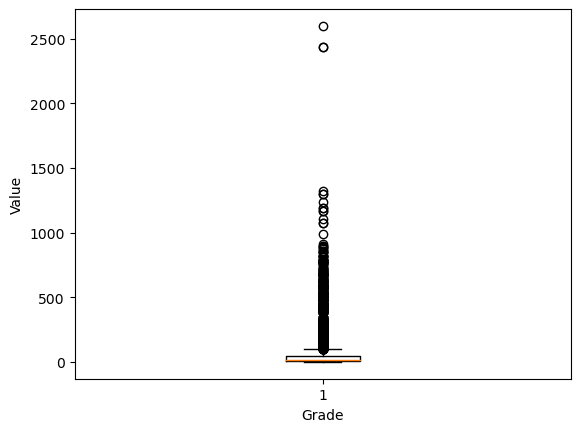

In [173]:
# Create boxplot
plt.boxplot(x= prepared['FINAL STUDENT WEIGHT'])

# Label axes
plt.xlabel('Grade')
plt.ylabel('Value')

# Show plot
plt.show()


There is clearly an outlier, to visualize deeper level of which grades are mostly achieved, here is a way to do it:

In [174]:
prepared[prepared['FINAL STUDENT WEIGHT'] >= 1000]

id  Country code 3-character  \
1167  479183  United States of America   
1522  475750  United States of America   
1627  475746  United States of America   
1639  222603                 Indonesia   
2342  479612  United States of America   
2878  479611  United States of America   
3374  224930                 Indonesia   
3592  479263  United States of America   
4336  224945                 Indonesia   
4442  479241  United States of America   
4893  226919                 Indonesia   
6536  222614                 Indonesia   
6681  479613  United States of America   
9589  224955                 Indonesia   

      Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)  \
1167                                                                                   8400000   
1522                                                                                   8400000   
1627                                                                                   8400000   
1639                                                                                   3600000   
2342                                                                                   8400000   
2878                                                                                   8400000   
3374                                                                                   3600000   
3592                                                                                   8400000   
4336                                                                                   3600000   
4442                                                                                   8400000   
4893                                                                                   3600000   
6536                                                                                   3600000   
6681                                                                                   8400000   
9589                                                                                   3600000   

     Stratum ID 7-character (cnt + region ID + original stratum ID)  \
1167                                                        USA9797   
1522                                                        USA9797   
1627                                                        USA9797   
1639                                                        IDN0001   
2342                                                        USA9797   
2878                                                        USA9797   
3374                                                        IDN0001   
3592                                                        USA9797   
4336                                                        IDN0001   
4442                                                        USA9797   
4893                                                        IDN0001   
6536                                                        IDN0001   
6681                                                        USA9797   
9589                                                        IDN0001   

     OECD country National Centre 6-digit Code  \
1167         OECD    United States of America    
1522         OECD    United States of America    
1627         OECD    United States of America    
1639     Non-OECD                    Indonesia   
2342         OECD    United States of America    
2878         OECD    United States of America    
3374     Non-OECD                    Indonesia   
3592         OECD    United States of America    
4336     Non-OECD                    Indonesia   
4442         OECD    United States of America    
4893     Non-OECD                    Indonesia   
6536     Non-OECD                    Indonesia   
6681         OECD    United States of America    
9589     Non-OECD                    Indonesia   

      School ID 7-digit (region ID + stratum ID + 3-digit school ID)  \
1167               

All the 14 results that are above 1000 are from Indonesia or USA, it will need further evaluation

In [175]:
# igtype_changed = igtype_changed[igtype_changed['FINAL STUDENT WEIGHT'] <= 1000]

In [176]:
grade_gone = prepared[prepared['International Grade'] <= 12]
grade_gone['National Centre 6-digit Code'].value_counts()

Mexico                       720
Italy                        608
Spain                        489
Canada                       444
Brazil                       391
                            ... 
Serbia                        82
Lithuania                     81
United Kingdom (Scotland)     66
Perm (Russian Federation)     38
Liechtenstein                  5
Name: National Centre 6-digit Code, Length: 66, dtype: int64

There are 66 different countries and provinces that PISA test is done.

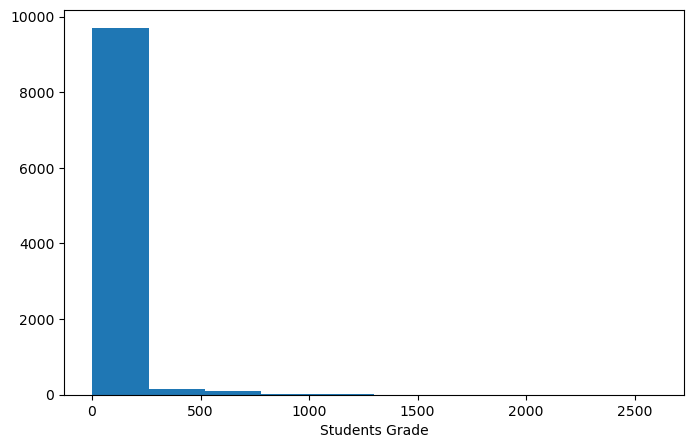

In [177]:
#plot how is the scoring distribution of students:
plt.figure(figsize=[8, 5])
plt.hist(data = grade_gone, x = 'FINAL STUDENT WEIGHT')
plt.xlabel('Students Grade')
plt.show()

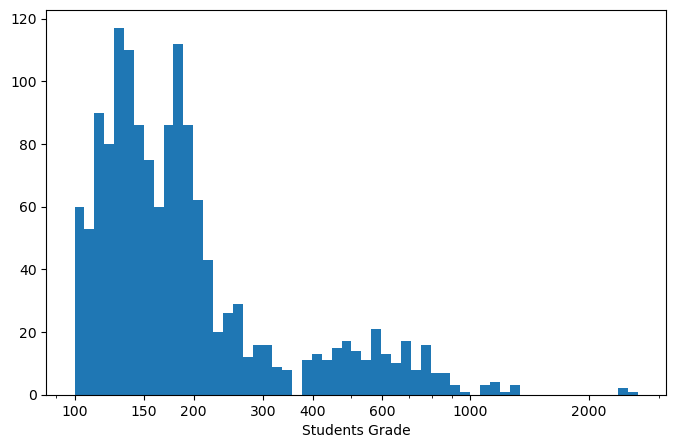

In [178]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2, np.log10(grade_gone['FINAL STUDENT WEIGHT'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = grade_gone, x = 'FINAL STUDENT WEIGHT', bins = bins)
plt.xscale('log')
plt.xticks([1e2,1.5e2, 2e2, 3e2, 4e2, 6e2, 1e3, 2e3],['100','150','200','300', '400', '600', '1000', '2000'])
plt.xlabel('Students Grade')
plt.show()

The plot displaying PISA test scores reveals a unique logarithmic decline from 100 to 2000, with distinctive features including twin peaks at 130 and 200, a slight incline between 400-1000, and a sharp drop just before 400. These patterns highlight significant variations in educational performance among participating countries and regions. Further investigation is needed to understand the factors driving these trends, their policy implications, and how to address disparities and improve global educational outcomes effectively.


> Next is to Visualize how is participant countries expressed:

In [179]:
# Returns the sum of all not-null values in column
country_sum = grade_gone['National Centre 6-digit Code'].value_counts().sum()

# By default, returns the decreasing order of the frequency.
country_count = grade_gone['National Centre 6-digit Code'].value_counts()

## Return the highest frequency in the column
max_type_count = country_count[0]

total_records = len(grade_gone['National Centre 6-digit Code'])
country_ratio = country_count/total_records
country_order = country_count.index

## Return the maximum proportion, or in other words, 
## compute the length of the longest bar in terms of the proportion
prop = max_type_count / country_sum

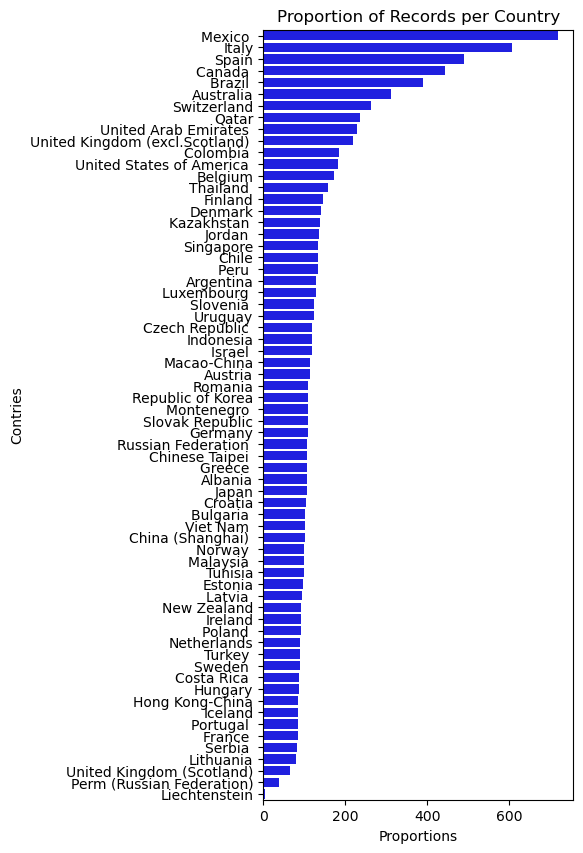

In [180]:
# Specify the figure size in inches, for both X, and Y axes
plt.figure(figsize =[4,10])
sb.countplot(grade_gone, y = 'National Centre 6-digit Code', color = 'blue', order = country_order)
plt.xlabel('Number of Records')
plt.ylabel('Contries')
plt.xlabel('Proportions');
plt.title('Proportion of Records per Country')
plt.show()

The plotted bar chart, which reflects proportions rather than raw counts, offers a captivating perspective on the geographic distribution of contributors in the dataset. Predominantly, Mexico, Italy, Canada, and Brazil emerge as the top contributing nations, collectively representing a significant chunk of students. Given this, it's pivotal to approach the data cognizant of the fact that outcomes and trends may be disproportionately influenced by students from these countries, which might introduce a geographic bias.


As most of the frequent countries are among (OECD Countries), let us see if this proved by a pie chart:

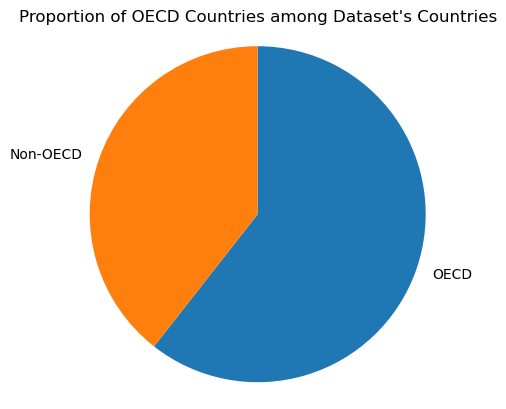

In [181]:
# Use the same dataset
sorted_counts = grade_gone['OECD country'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title("Proportion of OECD Countries among Dataset's Countries")
plt.axis('square');

It is clear from the pie chart most of my data is from OCED countries.

Now Next to see students spendture time: 

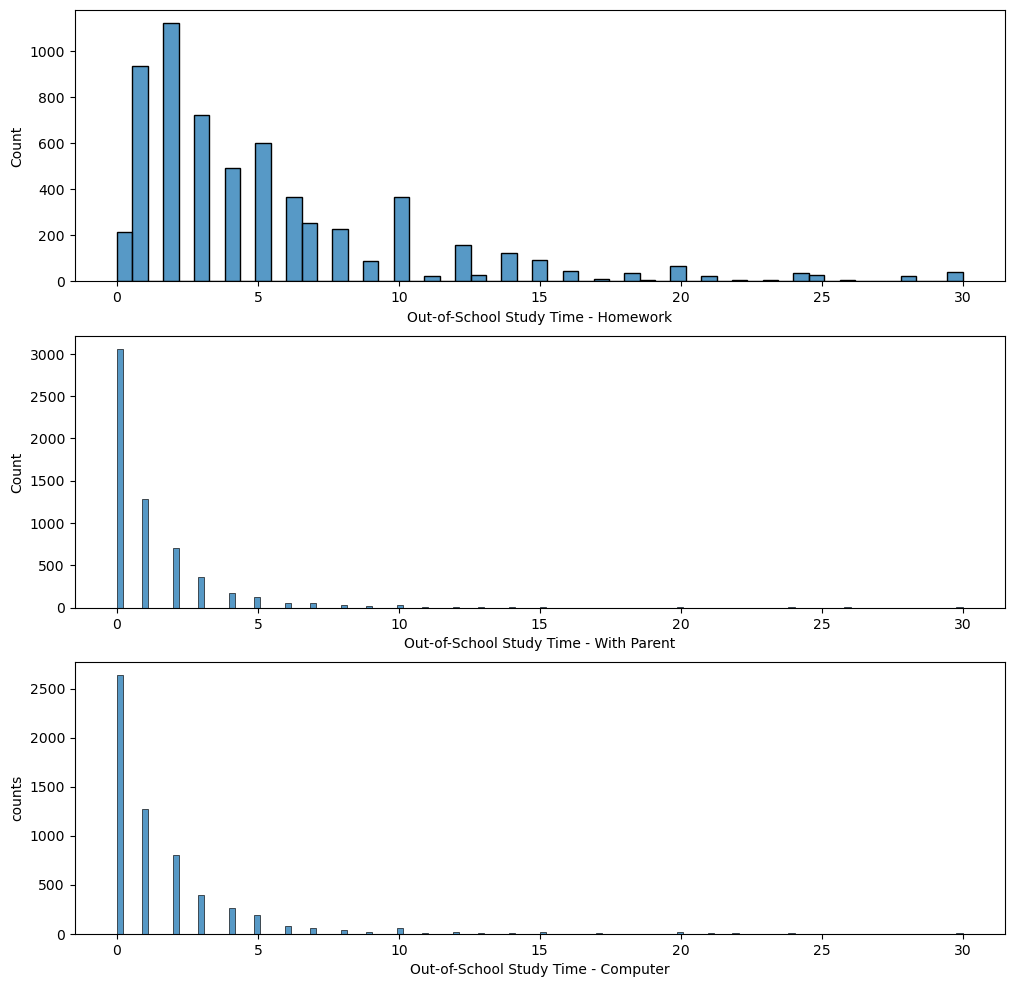

In [182]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.histplot(data = grade_gone, x = 'Out-of-School Study Time - Homework', color = default_color, ax = ax[0])
sb.histplot(data = grade_gone, x = 'Out-of-School Study Time - With Parent', color = default_color, ax = ax[1])
sb.histplot(data = grade_gone, x = 'Out-of-School Study Time - Computer', color = default_color, ax = ax[2])

plt.ylabel('counts')
plt.show()
plt.show()

The data from the histograms shows students spend more time in terms of hours on homework than spending time with family and outside school explorations.

I'll now look at the other features in the data to see if any of them hold interesting properties.

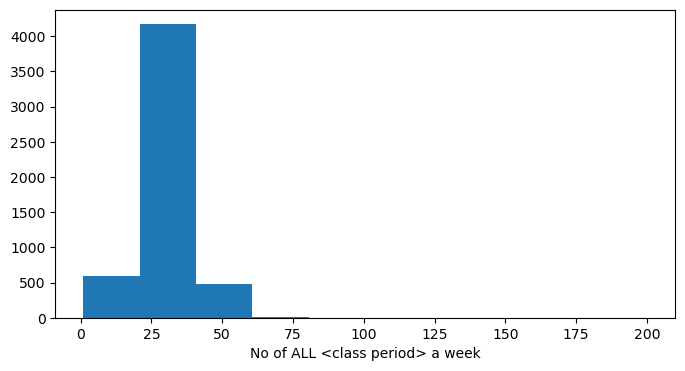

In [183]:
# let's start with the major dimensions 

fig = plt.subplots(figsize = [8,4])

variables = ['No of ALL <class period> a week']
for i in range(len(variables)):
    var = variables[i]
    plt.hist(data = grade_gone, x = var)
    plt.xlabel('{}'.format(var))

plt.show()

In [184]:
outliers_gone = grade_gone[grade_gone['No of ALL <class period> a week'] <= 100]

In the data, the majority of students typically undergo between 30 to 40 hours of classes weekly. However, there are some notable outliers, especially among students from Singapore. Some Singaporean students report an exceptionally high number of class hours, reaching up to 100 hours a week. This extreme value is significantly above the typical range and suggests either an incredibly intensive study regimen or a possible data recording discrepancy. 


> Now further evaluating possible contributing factors:

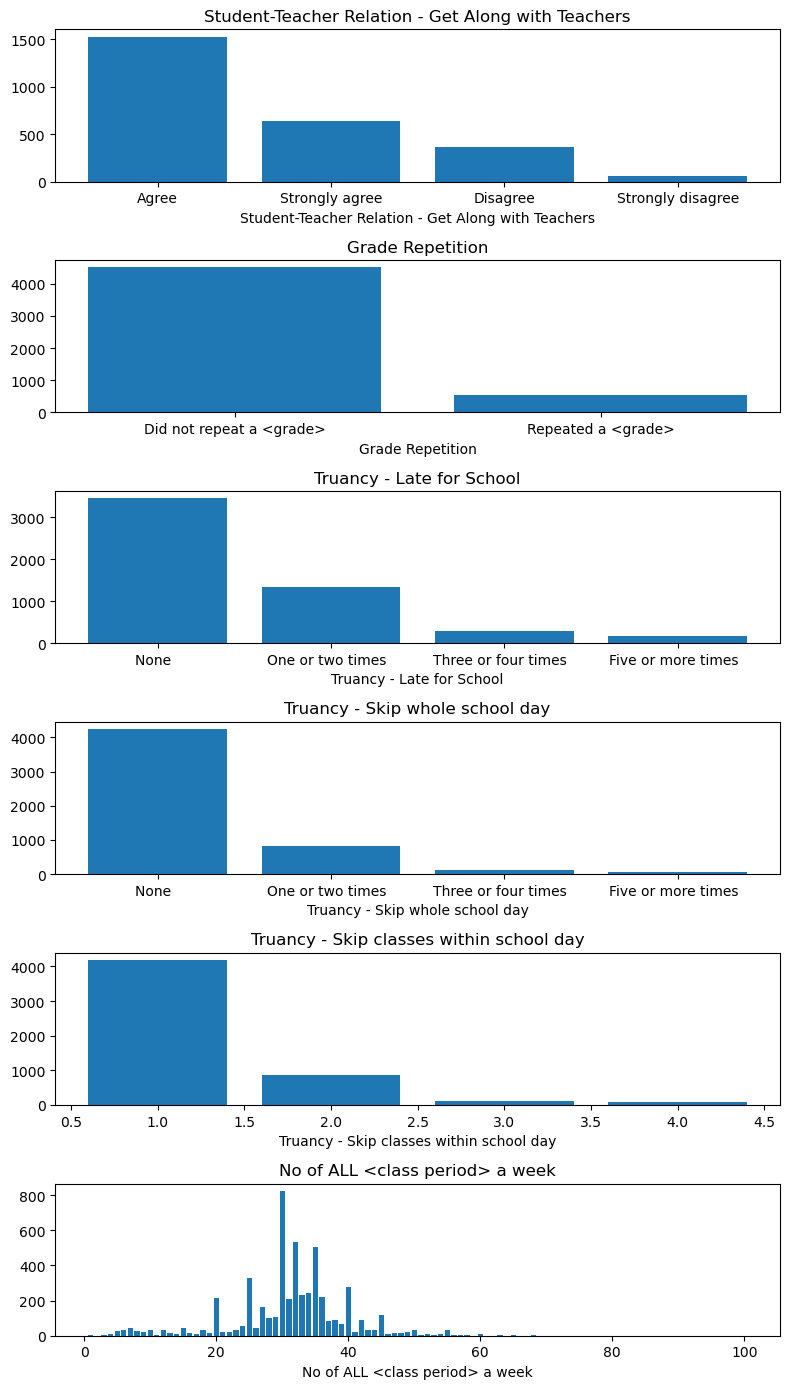

In [185]:
# let's start with the major school wise facts that may contribute, student-teacher relation, any Tuancy in respect of time and type, number of classes in hours, and grade repition.

fig, ax = plt.subplots(nrows=6, figsize=[8, 14])

variables = ['Student-Teacher Relation - Get Along with Teachers', 
             'Grade Repetition', 
             'Truancy - Late for School', 
             'Truancy - Skip whole school day', 
             'Truancy - Skip classes within school day',
             'No of ALL <class period> a week']

for i, var in enumerate(variables):
    ax[i].bar(x=outliers_gone[var].value_counts().index, 
              height=outliers_gone[var].value_counts().values)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_title(var)

plt.tight_layout()
plt.show();


School-wise factors play a significant role in understanding students' academic experience. A paramount factor is the student-teacher relation, where the majority of students conveyed that they have a good relationship with their teachers. A smaller yet notable proportion of students strongly agree with this sentiment, suggesting an exceptionally positive bond. However, there's also a minority that disagrees, pointing towards areas where school dynamics could be improved.

Regarding truancy, both its frequency and type provide insights. Most students adhere to their schedules and are punctual, emphasizing a general commitment to their educational responsibilities. If any classes are skipped, it's usually limited to one hour or less, which suggests that while occasional distractions or challenges might arise, they do not typically result in extended absences.

Lastly, the data on grade repetition highlights a positive academic trend: the vast majority of students don't find themselves needing to repeat a grade. This can be indicative of efficient teaching methods, students' dedication, or a combination of both, leading to a successful academic progression.

>Next is to look over what factors outside school can have effect:





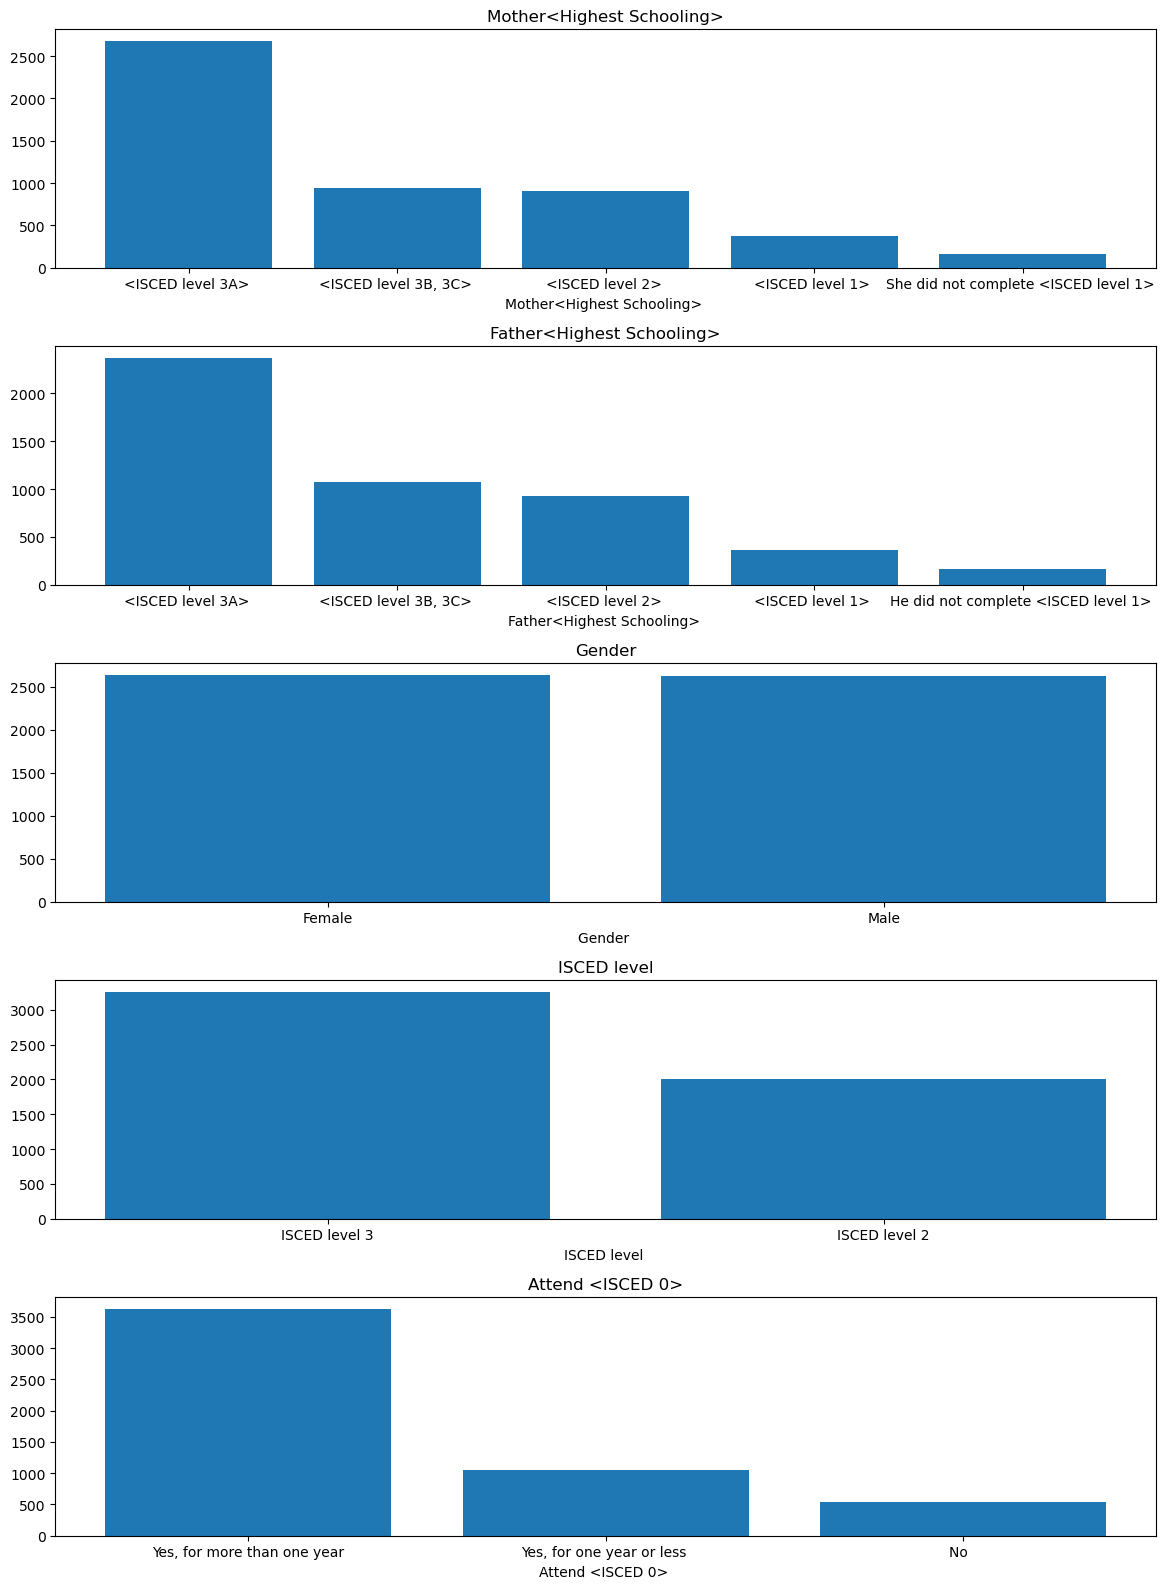

In [186]:
# let's start with the major schoolwise facts that may contribute, student-teacher relation, any Tuancy in respect of time and type, number of classes in hours, and grade repition.

fig, ax = plt.subplots(nrows=5, figsize=[12, 16])

variables = ['Mother<Highest Schooling>', 
             'Father<Highest Schooling>', 
             'Gender', 
             'ISCED level',
             'Attend <ISCED 0>']

for i, var in enumerate(variables):
    ax[i].bar(x=outliers_gone[var].value_counts().index, 
              height=outliers_gone[var].value_counts().values)
    ax[i].set_xlabel('{} '.format(var))
    ax[i].set_title(var)

plt.tight_layout()
plt.show();


In [187]:
categoric_vars = ['National Centre 6-digit Code', 'OECD country', 'Gender', 'Student-Teacher Relation - Get Along with Teachers', 'Mother<Highest Schooling>','Father<Highest Schooling>','Truancy - Late for School','Truancy - Skip whole school day','Truancy - Skip classes within school day']
numeric_vars = ['FINAL STUDENT WEIGHT','No of ALL <class period> a week', 'Out-of-School Study Time - With Parent','Out-of-School Study Time - Computer', 'Out-of-School Study Time - Homework']
clone3 = outliers_gone[['Gender', 'FINAL STUDENT WEIGHT', 'National Centre 6-digit Code','Out-of-School Study Time - Homework', 'Out-of-School Study Time - With Parent', 'Out-of-School Study Time - Computer', 'OECD country', 'No of ALL <class period> a week', 'Student-Teacher Relation - Get Along with Teachers', 'Mother<Highest Schooling>', 'Father<Highest Schooling>', 'Truancy - Late for School', 'Truancy - Skip whole school day', 'Truancy - Skip classes within school day']].copy()

clone3.to_csv('clone3.csv', index= False)

# def boxplot(x, y, **kwargs):
#     plt.figure(figsize = [20, 10])
#     sb.countplot(data = clone3, x =x, **kwargs)
#     plt.xticks(rotation =90)


# g = sb.PairGrid(clone3, x_vars=categoric_vars, palette = 'Blues')
# g.map(boxplot)
# plt.show();

Upon examining the student sample, a few defining characteristics emerge. First and foremost, when considering parental education as gauged by the ISCED levels, both parents of most students are observed to have attained an average education level of 3. This suggests a uniformity in the educational background of the parents, which may have implications on the students' home learning environment and academic support.

The gender distribution of the students is almost evenly split, but with a slight preponderance of females. This subtle skew might have implications in classroom dynamics, teaching methodologies, or even peer interactions, depending on the broader cultural and school-specific contexts.

Furthermore, a dominant proportion of these students has been enrolled in the ISCED test for a duration surpassing a year. This prolonged engagement indicates that most students in this sample have had sufficient time to familiarize themselves with the ISCED system, its requirements, and its evaluative measures. Such familiarity might play a role in their academic preparedness and overall performance.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest here appears to be the International Grade, which shows a concentrated distribution with most students scoring between grades 9 and 10. When considering the geographic distribution, this high achievement pattern could be influenced by the prominent contribution of students from countries like Italy, Mexico, Spain, and Switzerland. It would be worthwhile to examine if students from these countries have a particular propensity to score in the higher grade bracket, potentially skewing the overall results. Unusual points in the data are the limited counts for lower International Grades, notably grade 7, and the disproportionately high number of students from specific countries.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Unusual distributions would be the stark contrast between the high counts for grades 9 and 10 versus the lower grades, and the high representation of certain countries over others. This may necessitate a more in-depth investigation to ascertain the reasons behind such disparities and distributions, ensuring they don't unintentionally bias any conclusions drawn from the dataset.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [188]:
categoric_vars = ['National Centre 6-digit Code', 'OECD country', 'Gender', 'Student-Teacher Relation - Get Along with Teachers', 'Mother<Highest Schooling>','Father<Highest Schooling>','Truancy - Late for School','Truancy - Skip whole school day','Truancy - Skip classes within school day']
numeric_vars = ['FINAL STUDENT WEIGHT','No of ALL <class period> a week', 'Out-of-School Study Time - With Parent','Out-of-School Study Time - Computer', 'Out-of-School Study Time - Homework']

To start off with, I want to look at the pairwise correlations present between features in the data.

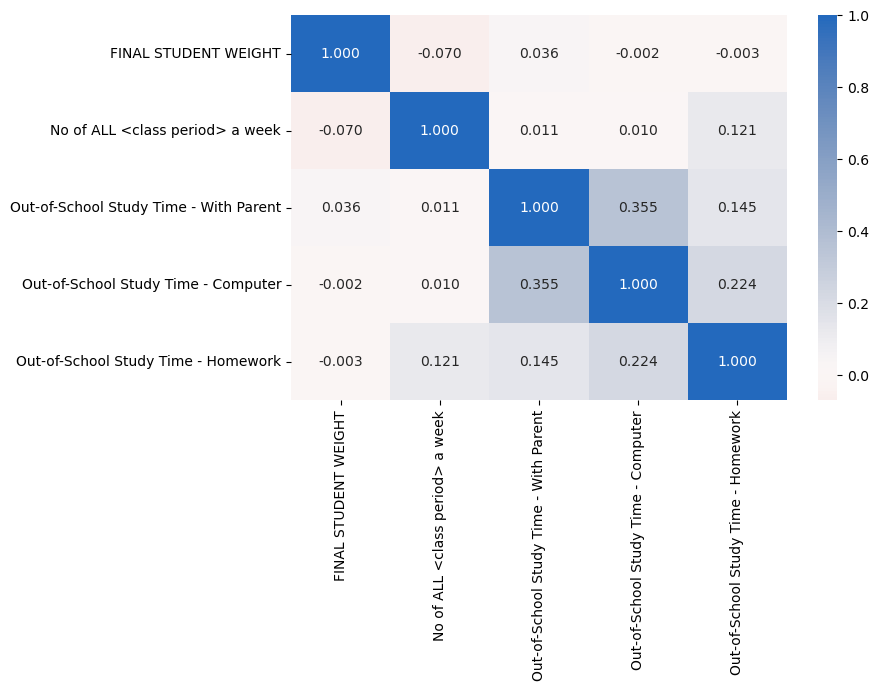

In [189]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(outliers_gone[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

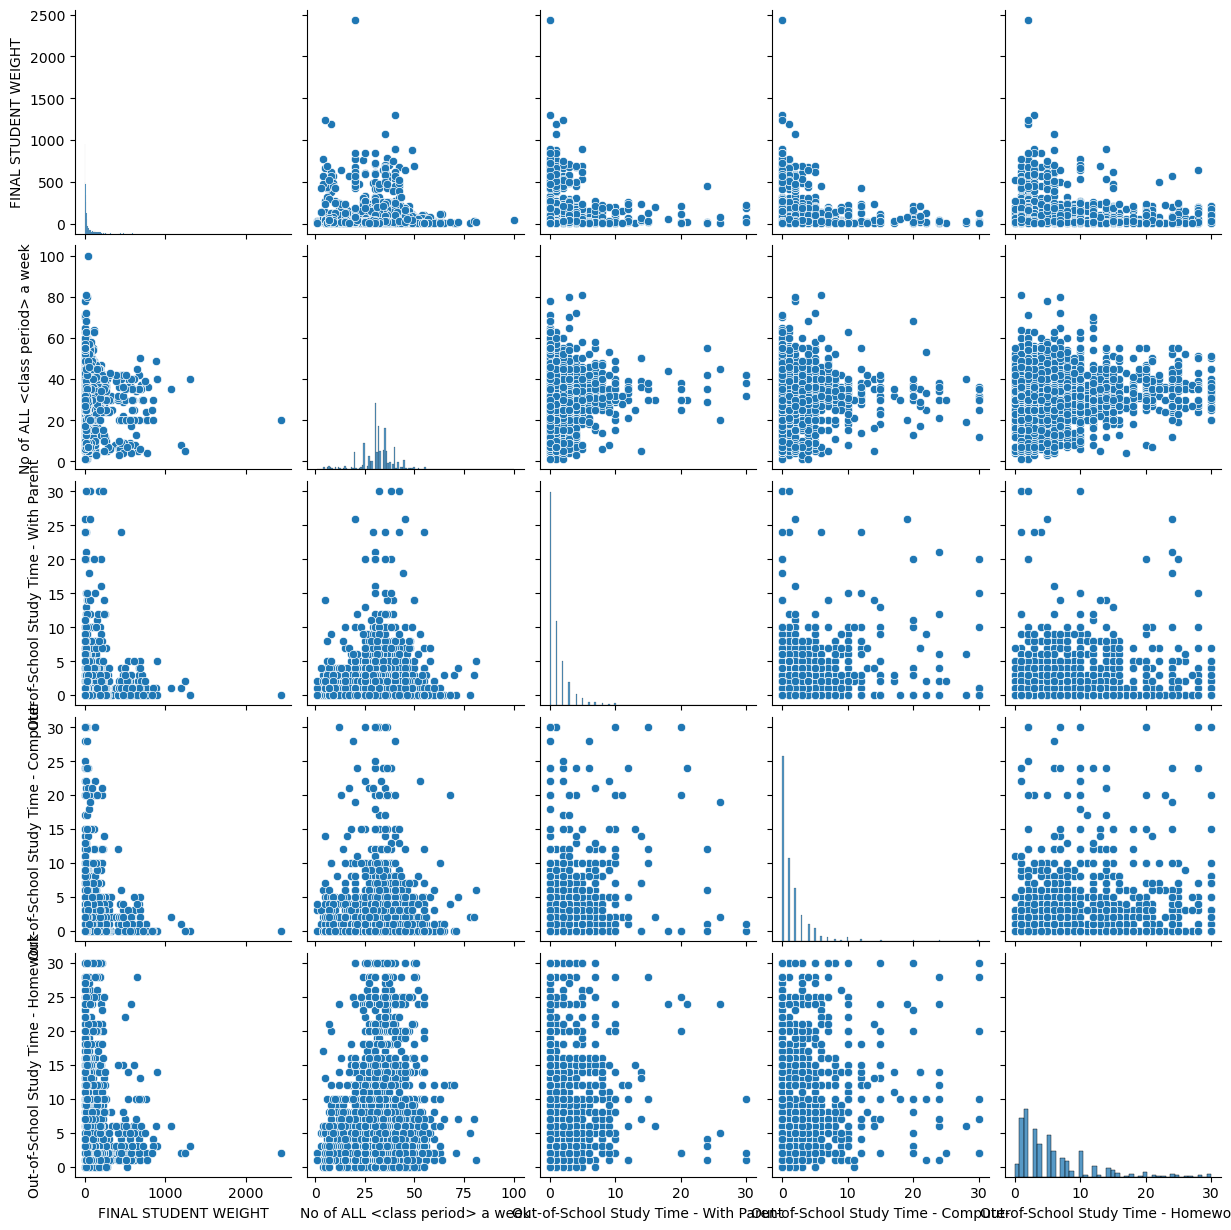

In [190]:
# plot matrix of numeric variables:
sb.pairplot(outliers_gone[numeric_vars]);

They don't have strong correlations with any other numeric variables in the dataset, but it shows a weak positive relation of time spendture of students spending with their parents and computer, and that spending time on homework is weakly positive with the total number of class periods in school.
>Now I look for any relations among categorical features.

<Figure size 200x500 with 0 Axes>

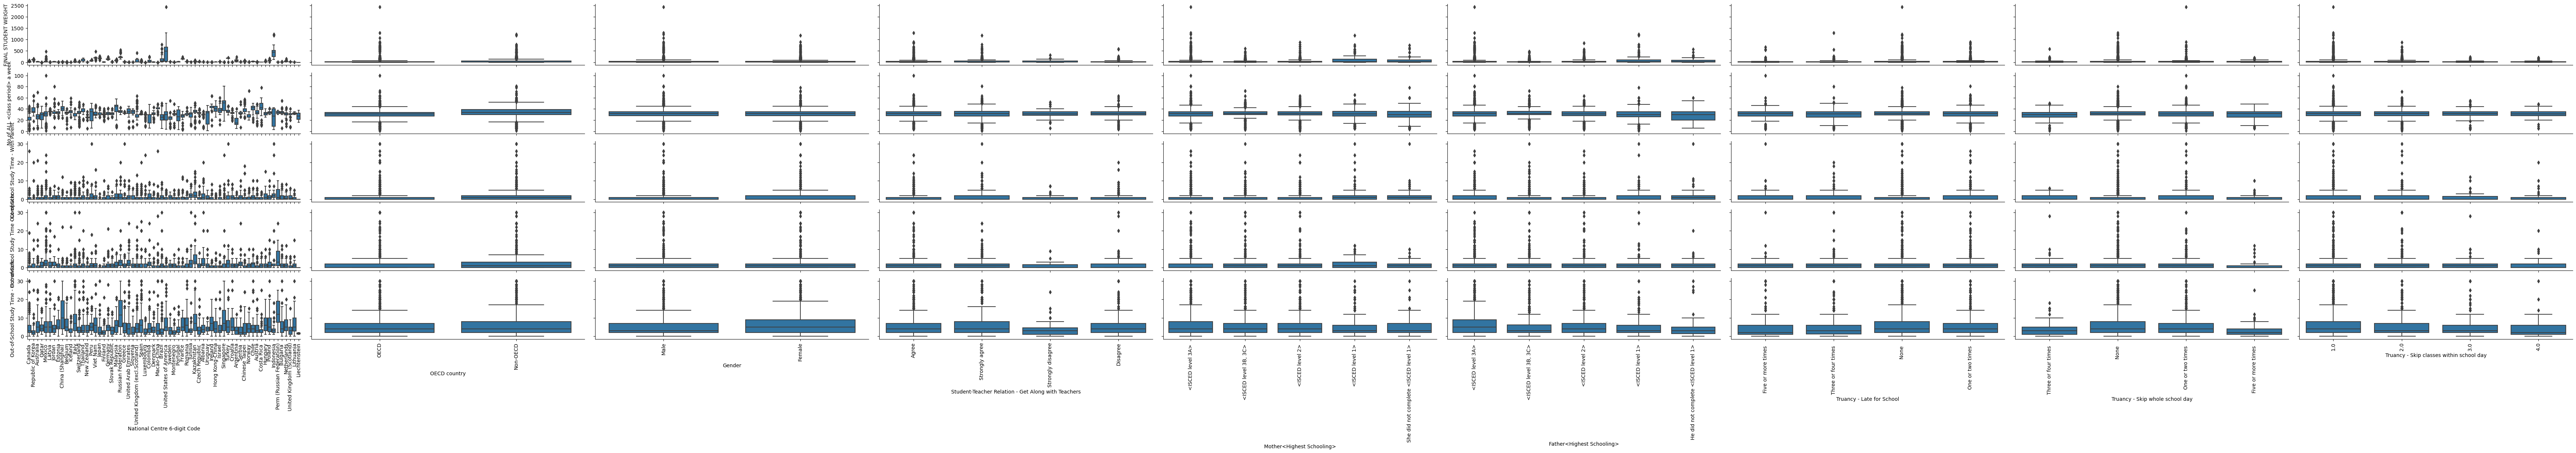

In [191]:
plt.figure(figsize = [2, 5])
def boxplot(x, y, **kwargs):
    sb.boxplot(x =x, y =y, **kwargs)
    plt.xticks(rotation =90)
    

g = sb.PairGrid(clone3, y_vars=numeric_vars, x_vars=categoric_vars, height=2, aspect = 4)
g.map(boxplot)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Firstly, it's evident that the highest-scoring students come from Indonesia and the USA, despite Italy having more participants in the sample. This might indicate the quality of education in these countries.
Another noteworthy finding is that non-OECD countries tend to have students with higher average scores compared to OECD countries. Additionally, males scored slightly higher, which could be attributed to diligence in their studies although females tend to spend more time on homeworks.
As the educational levels of students' mothers and fathers did not seem to correlate with higher scores. In fact, students with parents at level 1 or lower education achieved higher scores than their peers, while students with parents of higher educational levels tend to spend more time on studying.
The data also reveals that students who spend more time on homework which are mainly in the USA and Singapore, tend to come from non-OECD countries, have good relationships with their teachers, experience minimal class truancies, and have parents with education levels of 2 and 3.
On the other hand, students who spend more time on computers are predominantly from Kazakhstan, Russia, and Bulgaria, with lower representation in Indonesia and the USA. These students also tend to have good relationships with their teachers, parents at education levels 2 and 3, and minimal truancy, usually skipping no more than two classes or a day of school.
Lastly, students with the highest number of classes per week are typically found in Singapore and Costa Rica. These students are often from non-OECD backgrounds, report dissatisfaction with their teacher-student relationships, have parents with lower education levels, and exhibit moderate rates of class and school-day truancy.
Students from kazakhestan and Tunisia spend by far the most time with parents averaging around 1 to 2 hours daily. While other countries spend less than 1 hour on average with parents, spend on average 2 3 hours on computer, and all countries spend on average 5 hours on homework outside school daily peaking in China, Russia and Singapore for around 15 hours daily.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The data graph presents several intriguing observations.
- non-OECD countries appear to harbor students who consistently achieve higher average scores than their OECD counterparts.
- It also came to my attention that the educational backgrounds of students' mothers and fathers don't necessarily align with higher scores. Surprisingly, students with parents holding Level 1 or lower education credentials actually tend to outperform their peers.
- When I delved into computer usage patterns, I have noted higher spendtur eof time on homeworks have not necesserily excelled students to a route of getting higher scores more efficiently.

## Multivariate Exploration

> I create some plots of multivariate, to explore further into the relations. Here's the first multivariate plot:


/var/folders/_c/fpzkxkgx7kz539gs00mzdv900000gn/T/ipykernel_1684/1059267278.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(data=clone3, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', hue='Gender', ci=None)


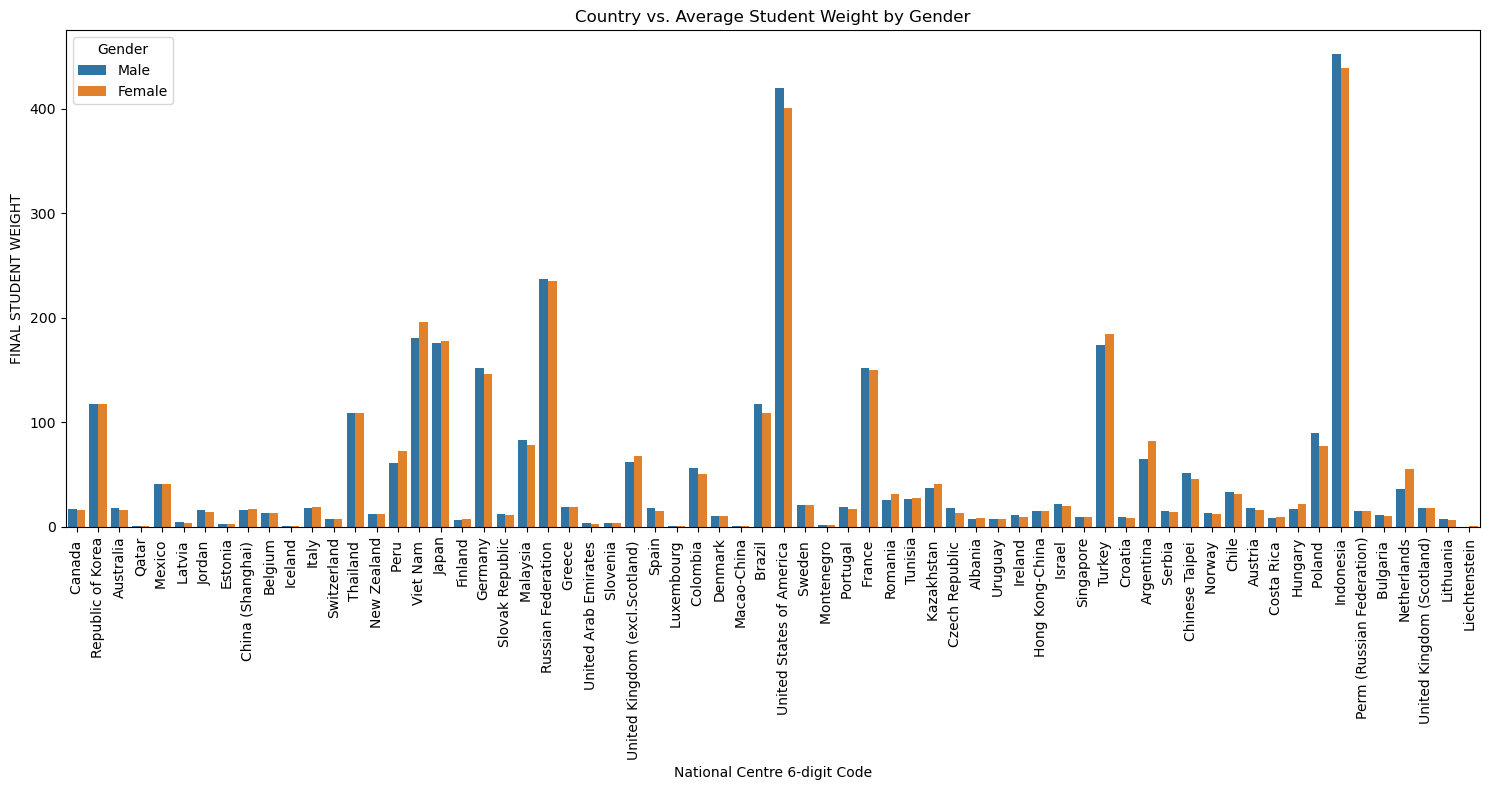

In [192]:
# 1. Country vs. Average Student Weight with Gender as a Hue
plt.figure(figsize=(15, 8))
sb.barplot(data=clone3, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', hue='Gender', ci=None)
plt.xticks(rotation=90)
plt.title("Country vs. Average Student Weight by Gender")
plt.tight_layout()
plt.show()

This bar chart represents the average student weight for each country, separated by gender. It is in the highest scoring countries that males score slightly higher than females.
The variation in student weights across countries is evident, and within many countries, there are discernible differences between the average weights of male and female students.
>Next, we'll plot "Country vs. Average Student Weight" with "Time on Computer" as a size parameter.

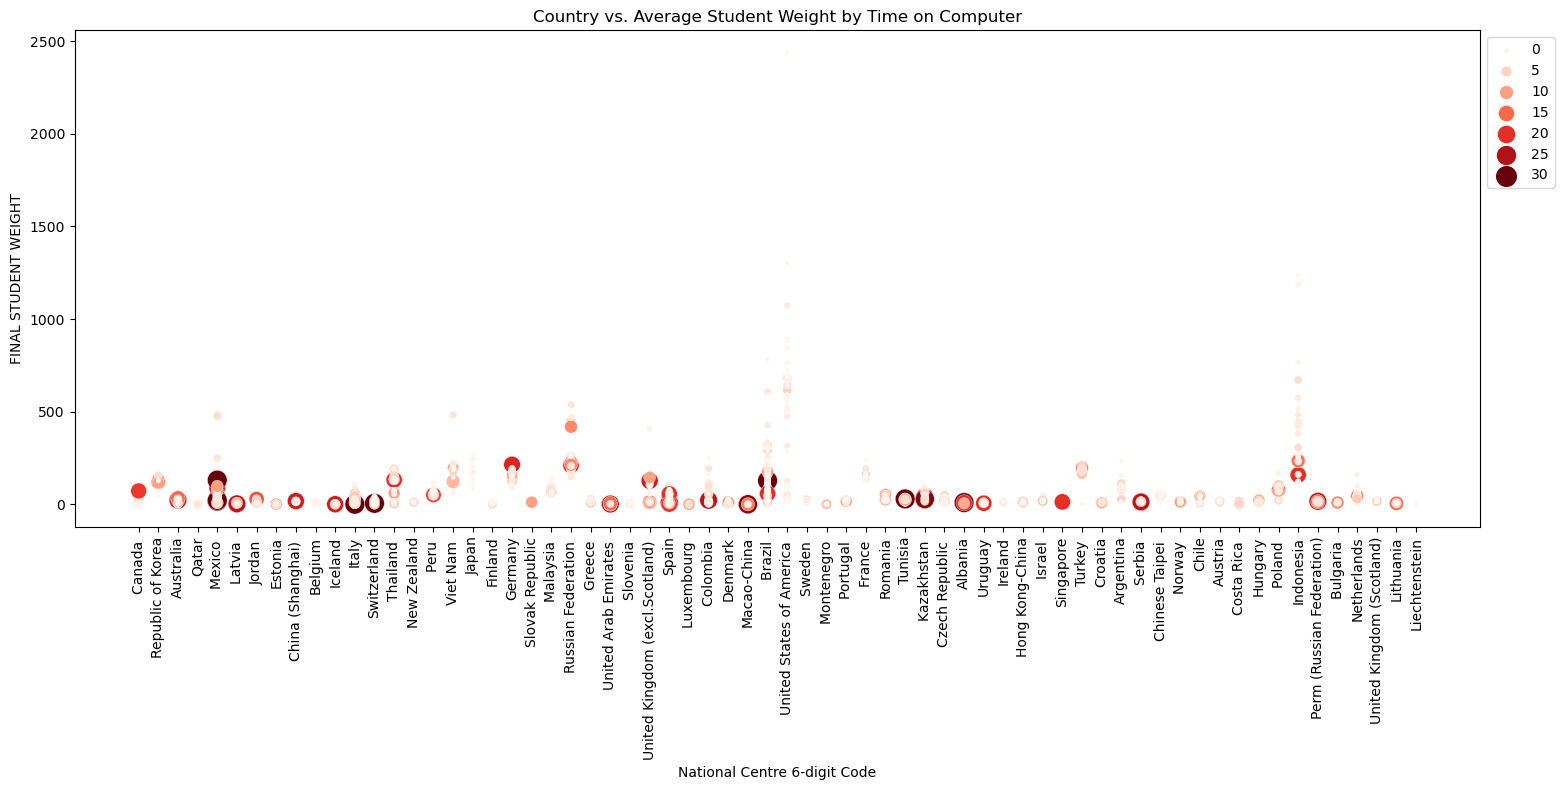

In [193]:
# 2. Country vs. Average Student Weight with Time on Computer as a Size Parameter
plt.figure(figsize=(15, 8))
sb.scatterplot(data=clone3, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', 
                size='Out-of-School Study Time - Computer', sizes=(10, 200), hue='Out-of-School Study Time - Computer', palette='Reds')
plt.xticks(rotation=90)
plt.title("Country vs. Average Student Weight by Time on Computer")
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

This scatterplot illustrates the average student weight for each country, with the size of each point representing the average time students spend on the computer.
The color gradient (from light to dark) also represents the amount of time spent on the computer.
Larger and darker points suggest that students in those countries, on average, spend more time on the computer.
>Next, I'll plot "Country vs. Average Student Weight" with "Time on Homework" as a size parameter.

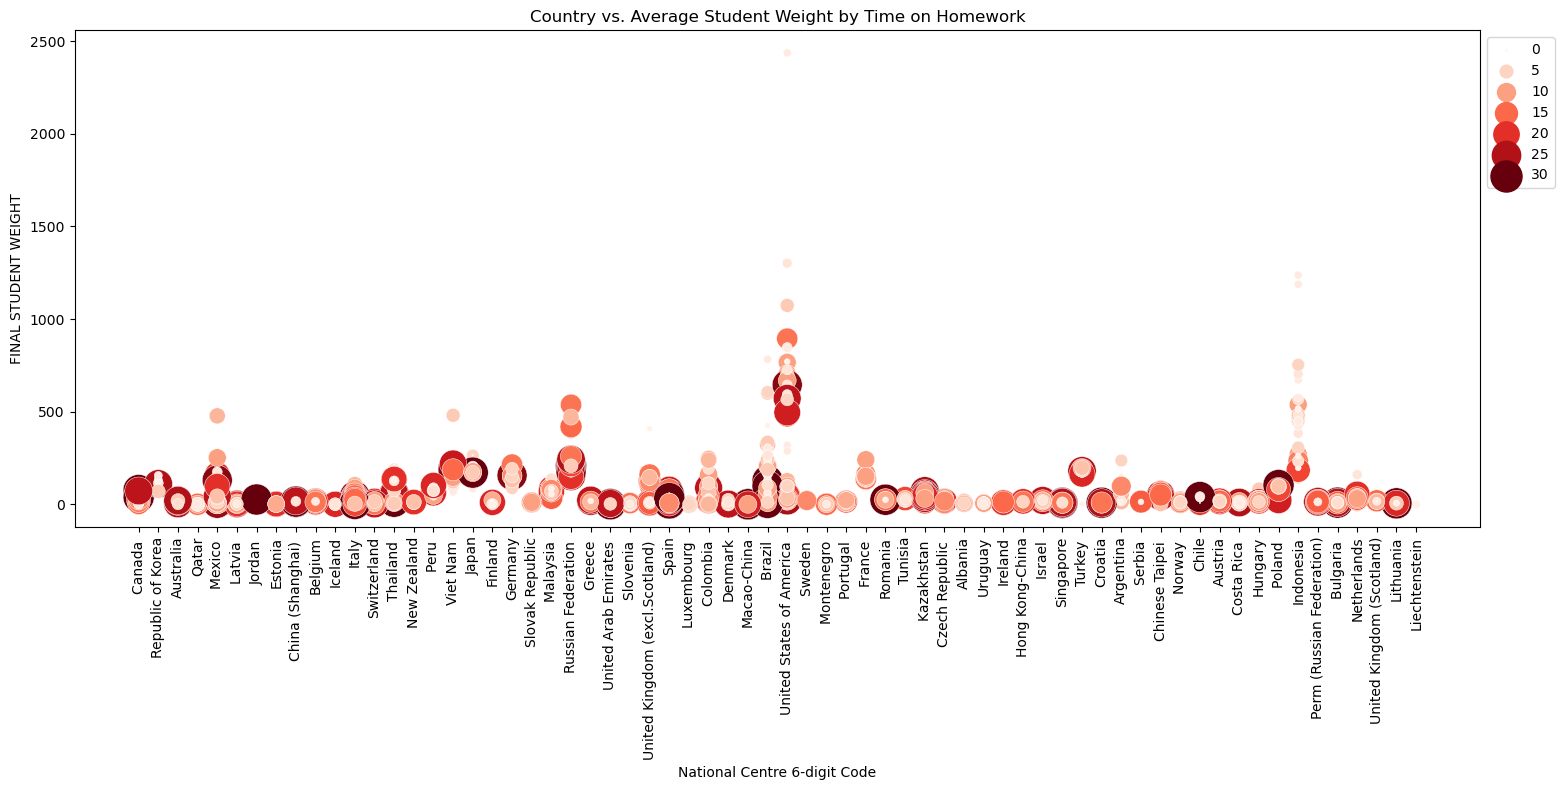

In [194]:
# 3. Country vs. Average Student Weight with Time on Homework as a Size Parameter
plt.figure(figsize=(15, 8))
sb.scatterplot(data=clone3, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', 
                size='Out-of-School Study Time - Homework', sizes=(1, 500), hue='Out-of-School Study Time - Homework', palette='Reds')
plt.xticks(rotation=90)
plt.title("Country vs. Average Student Weight by Time on Homework")
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

This scatterplot represents the average student weight for each country, with the size of each point indicating the average time students spend on homework.
The color gradient (from light to dark) also symbolizes the amount of time spent on homework.
Larger and darker points suggest that students in those countries, on average, spend more time on homework.
As from the data, students from US who spend lots of time on homework get high scores, while students in Indonesia with less spendture time on studying get as nearly same scores of US students. The same goes for other countries whom students try hard on studies yet there are schools and studentds who dont spend that much of time to get the same result.
As far as it goes it is clear from the plots that spending time on computer and socializing with parents could not express a significant relation, from now on I look further into homework time spendture.
As well as I will use one parental educational level as it aligns with the mother education level.

>Next, I'll visualize "Country vs. Average Student Weight" with "Time with Parents" as a size parameter.

In [240]:
clone3['father Highest Schooling'] = clone3['Father<Highest Schooling>'].replace({'He did not complete <ISCED level 1> ': 'less than level 1', '<ISCED level 1> ' : 'level 1', '<ISCED level 2> ' : 'level 2', '<ISCED level 3B, 3C> ': 'level 3','<ISCED level 3A> ': 'level 3' })

In [241]:
clone3['father Highest Schooling'].value_counts()

level 3              3444
level 2               929
level 1               361
less than level 1     162
Name: father Highest Schooling, dtype: int64

/Users/henan/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 10000x50000 with 0 Axes>

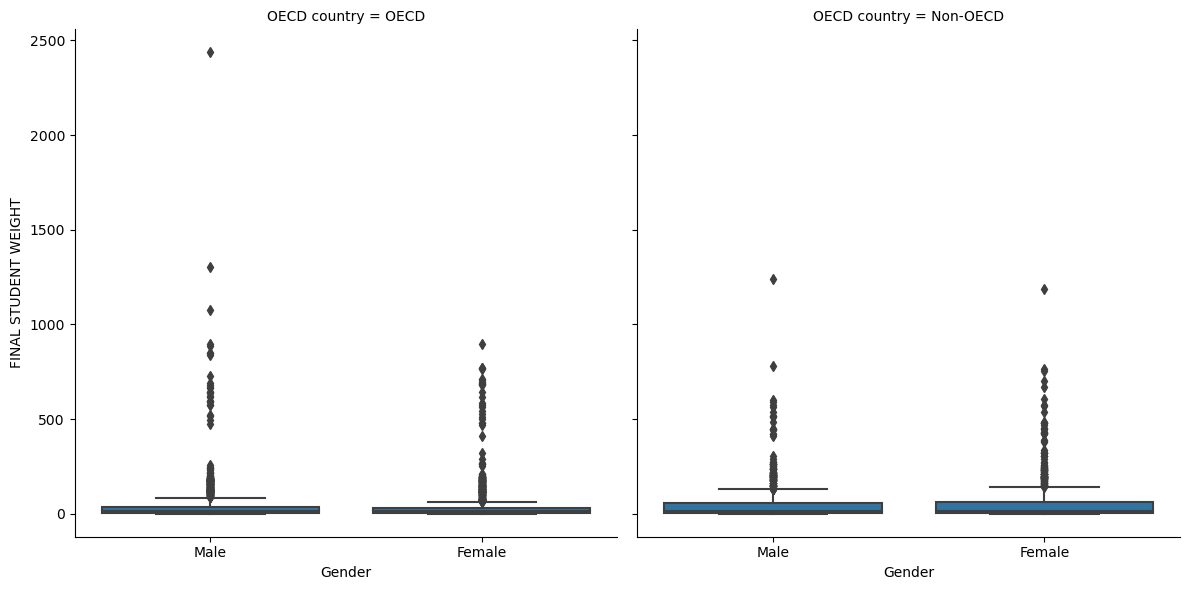

In [242]:
# scatter plot of grades vs. Gender vs. OECD country relation

plt.figure(figsize=[100, 500])
g = sb.FacetGrid(data =clone3, col ='OECD country', margin_titles = True, height = 6)
g.map(sb.boxplot, 'Gender', 'FINAL STUDENT WEIGHT')
plt.xticks(rotation= 0)
plt.show();


/Users/henan/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 10000x50000 with 0 Axes>

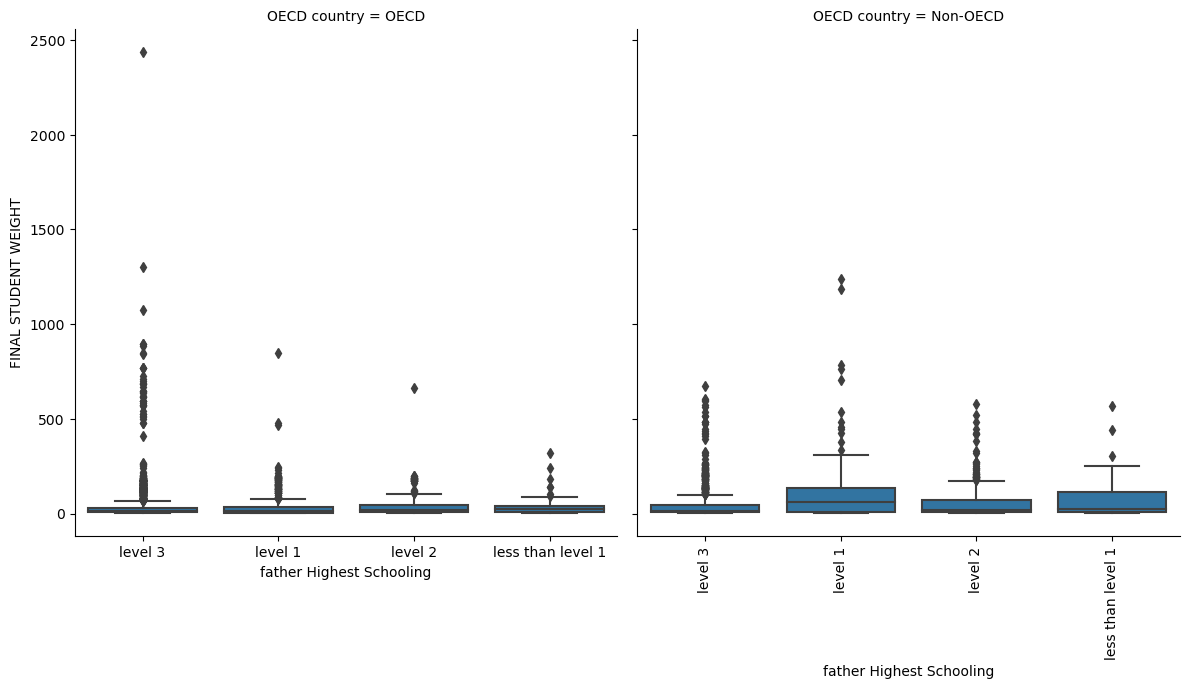

In [239]:
# scatter plot of grades vs. one parental education vs. OECD country relation

plt.figure(figsize=[100, 500])
g = sb.FacetGrid(data =clone3, col ='OECD country', margin_titles = True, height = 6)
g.map(sb.boxplot, 'father Highest Schooling', 'FINAL STUDENT WEIGHT')
plt.xticks(rotation= 90)
plt.show();


Parents with students that score higher from Non OECD countries tend to be educationally passed lower levels.

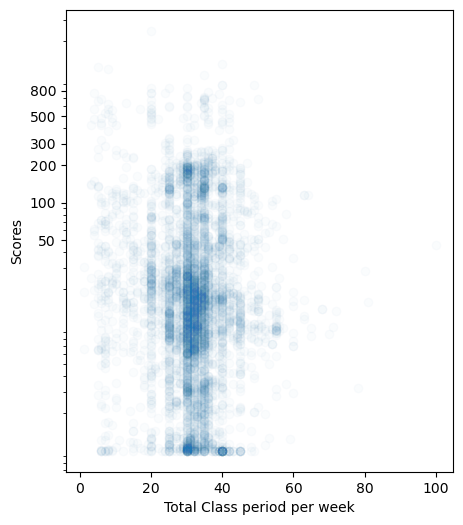

In [246]:
# scatter plot of grade vs. homework hours, with log transform on grade axis

plt.figure(figsize = [5, 6])
plt.scatter(data = clone3, x = 'No of ALL <class period> a week', y = 'FINAL STUDENT WEIGHT', alpha = 1/50)
plt.xlabel('Total Class period per week')
plt.yscale('log')
plt.yticks([5e1, 1e2, 2e2, 3e2, 5e2, 8e2], [50, '100', '200', '300', '500', '800'])
plt.ylabel('Scores')
plt.show()


Not nessecerily more studying time is related to higer scores. 

>Country vs. Student Weight showing Parents's Education, Truancy, and Teacher Relationship in one graph

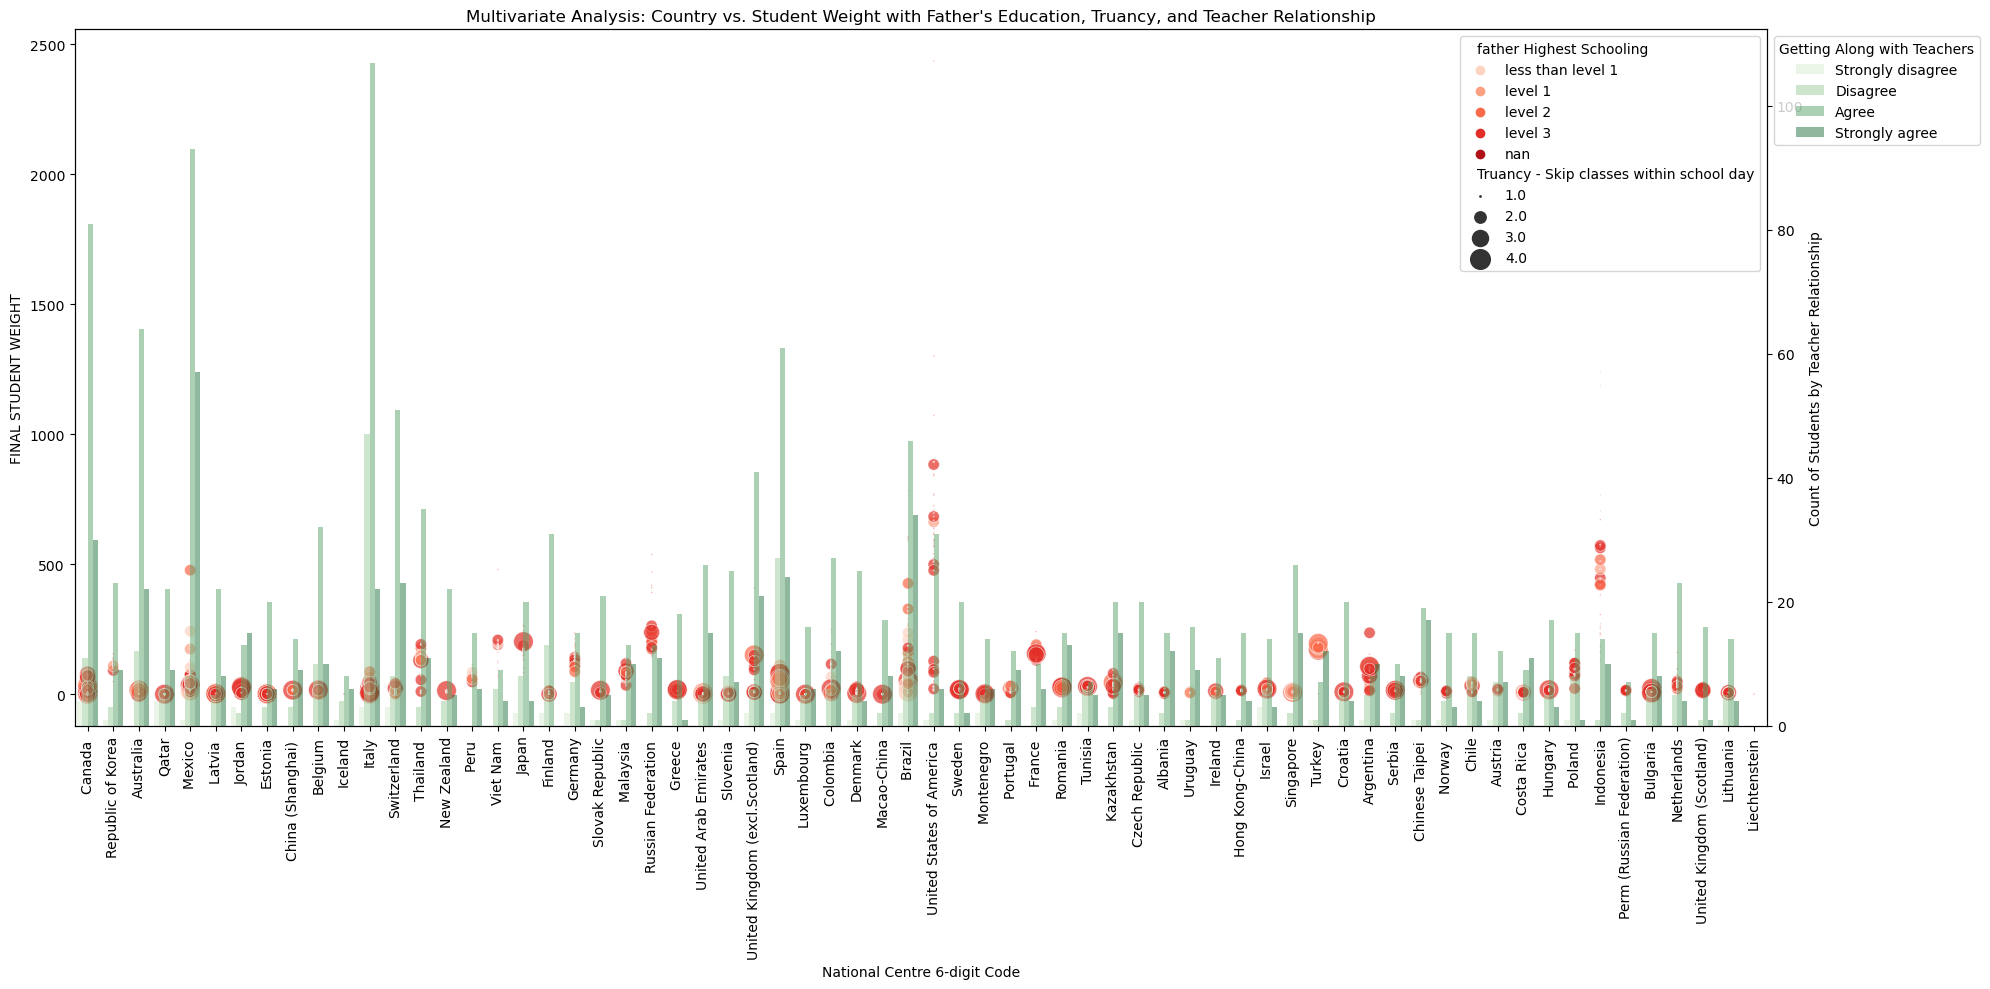

In [250]:
# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=clone3, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', 
                hue='father Highest Schooling',hue_order=hue_order_father,  size= 'Truancy - Skip classes within school day', sizes=(1, 200), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=clone3, x='National Centre 6-digit Code', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: Country vs. Student Weight with Father's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()




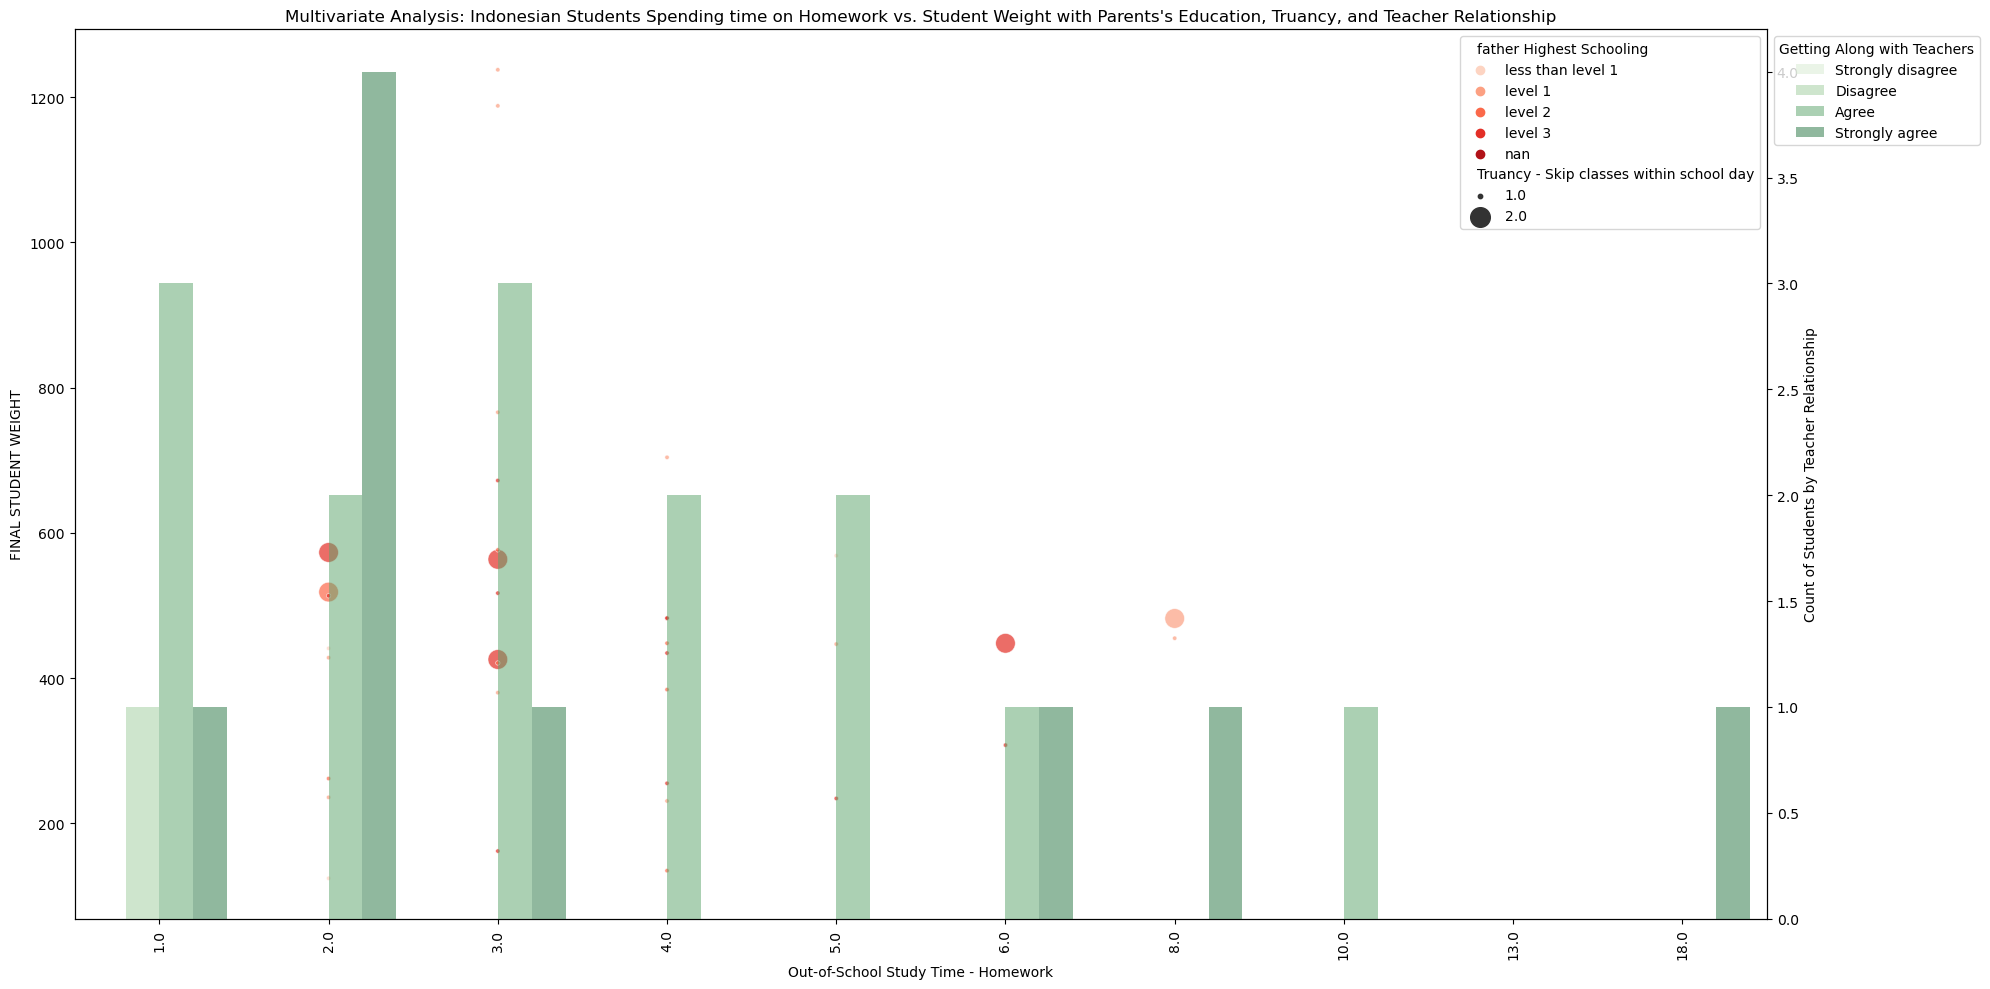

In [231]:
hue_order_father = sorted(map(str, indostudent['father Highest Schooling'].unique()), reverse=False)
# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=indostudent, x='Out-of-School Study Time - Homework', y='FINAL STUDENT WEIGHT', 
                hue='father Highest Schooling',hue_order=hue_order_father, size= 'Truancy - Skip classes within school day', sizes=(10, 200), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=indostudent, x='Out-of-School Study Time - Homework', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: Indonesian Students Spending time on Homework vs. Student Weight with Parents's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [248]:
# select students of indonesia
clone4 = clone3.copy()
stu_indo = (clone4['National Centre 6-digit Code'] == 'Indonesia')
indostudent = clone4.loc[stu_indo,:]

In [249]:
# select students of US
clone5 = clone3.copy()
stu_us = (clone5['National Centre 6-digit Code'] == 'United States of America ')
usstudent = clone5.loc[stu_us,:]

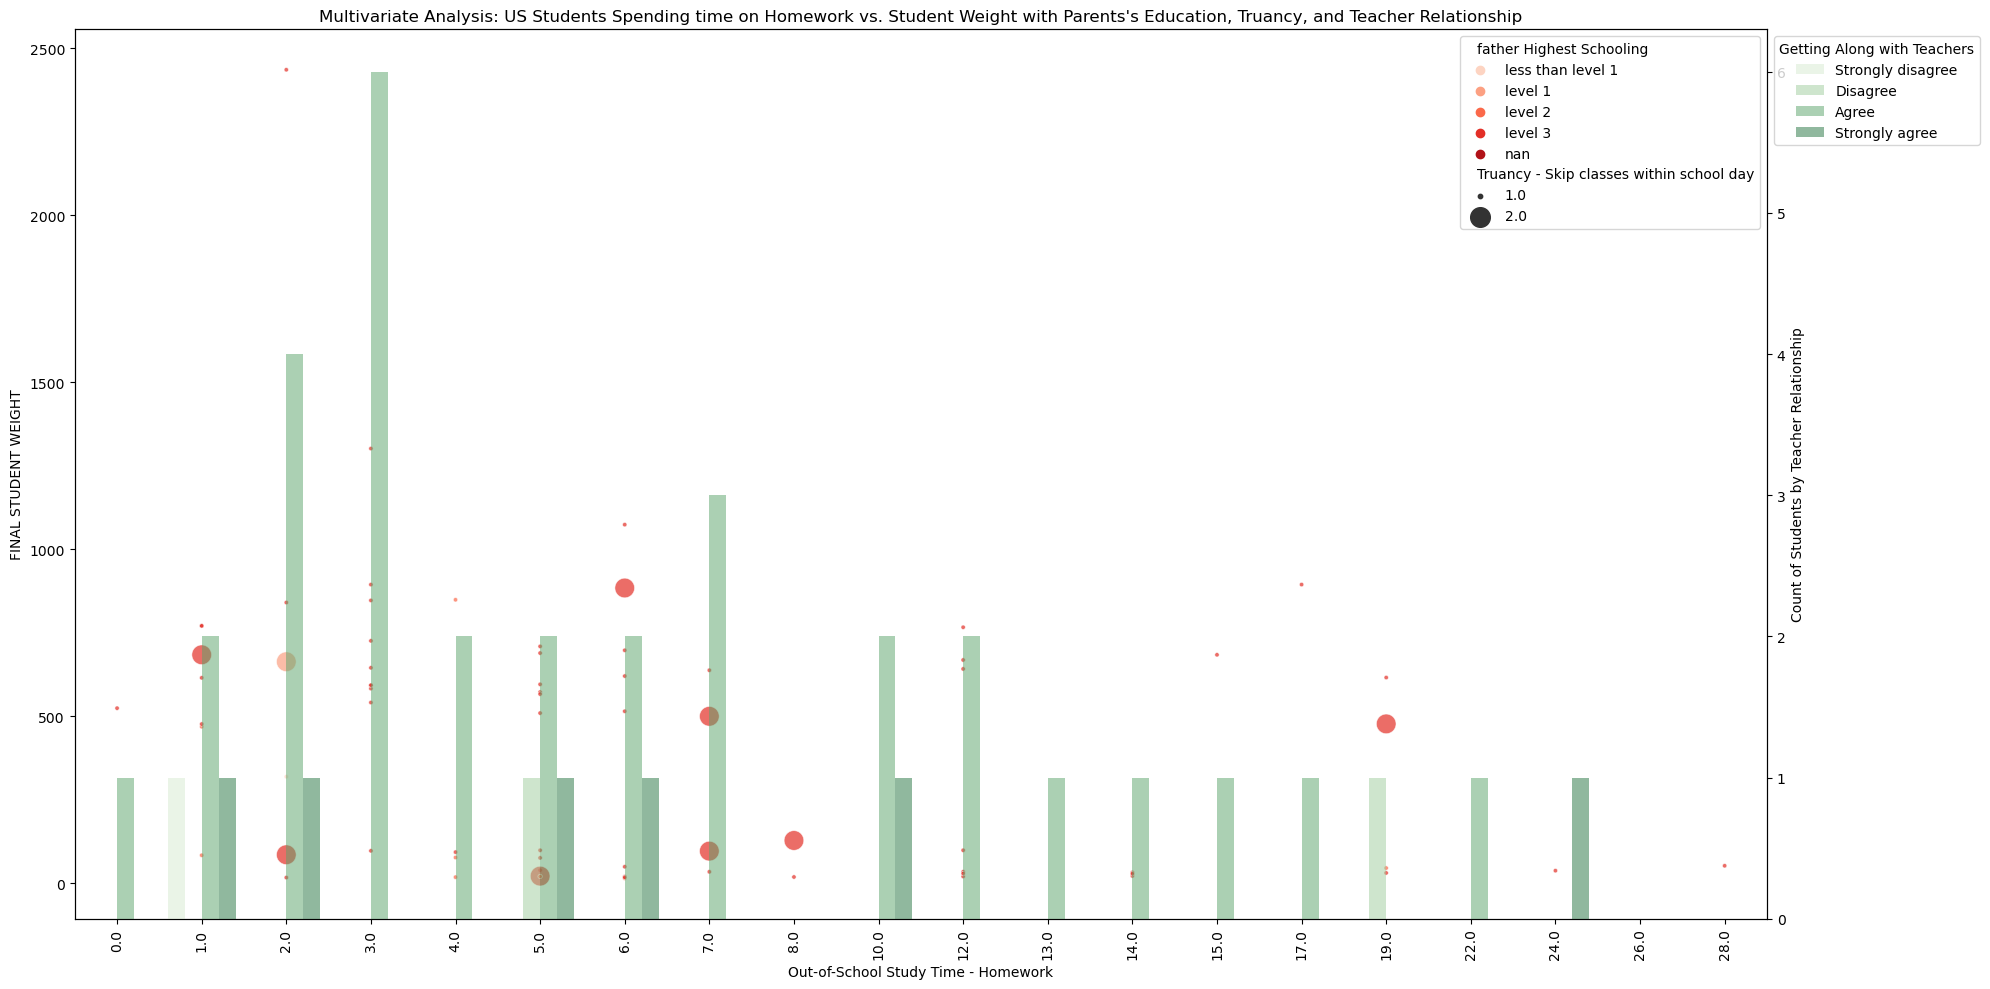

In [227]:
# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=usstudent, x='Out-of-School Study Time - Homework', y='FINAL STUDENT WEIGHT', 
                hue='father Highest Schooling',hue_order=hue_order_father,  size= 'Truancy - Skip classes within school day', sizes=(10, 200), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=usstudent, x='Out-of-School Study Time - Homework', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: US Students Spending time on Homework vs. Student Weight with Parents's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

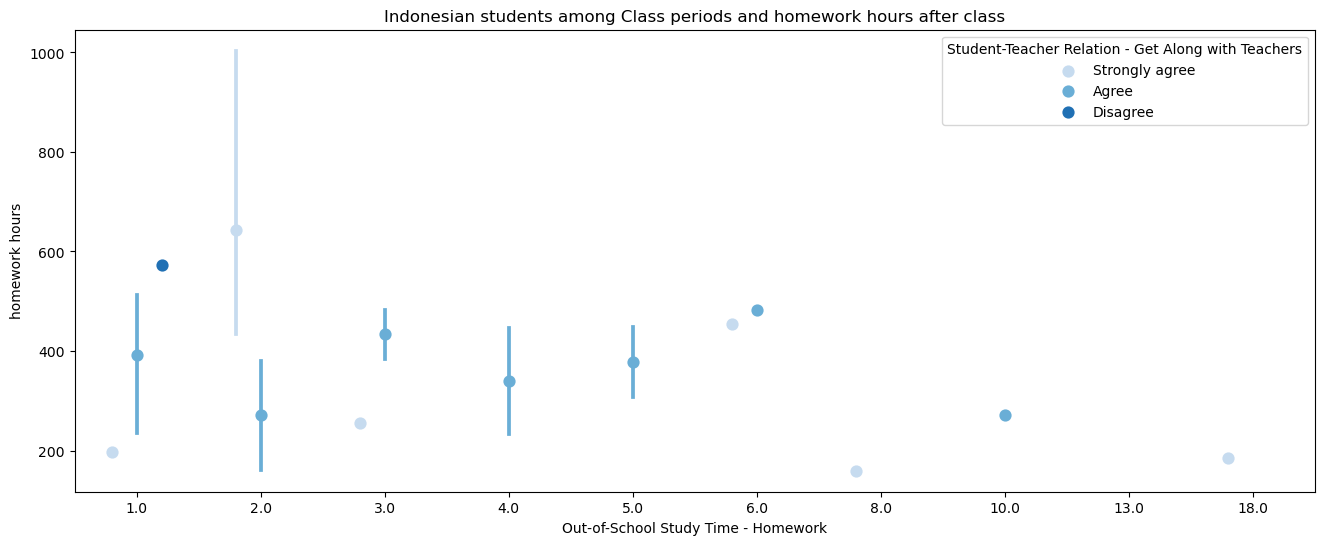

In [233]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = indostudent, hue = 'Student-Teacher Relation - Get Along with Teachers', y = 'FINAL STUDENT WEIGHT', x = 'Out-of-School Study Time - Homework',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Indonesian students among Class periods and homework hours after class')
plt.ylabel('homework hours')
# plt.yscale('log')
# plt.yticks([1e0, 1, 5e1, 2e2], ['0', '10', '5', '20'])
ax.set_yticklabels([],minor = True)
plt.show();

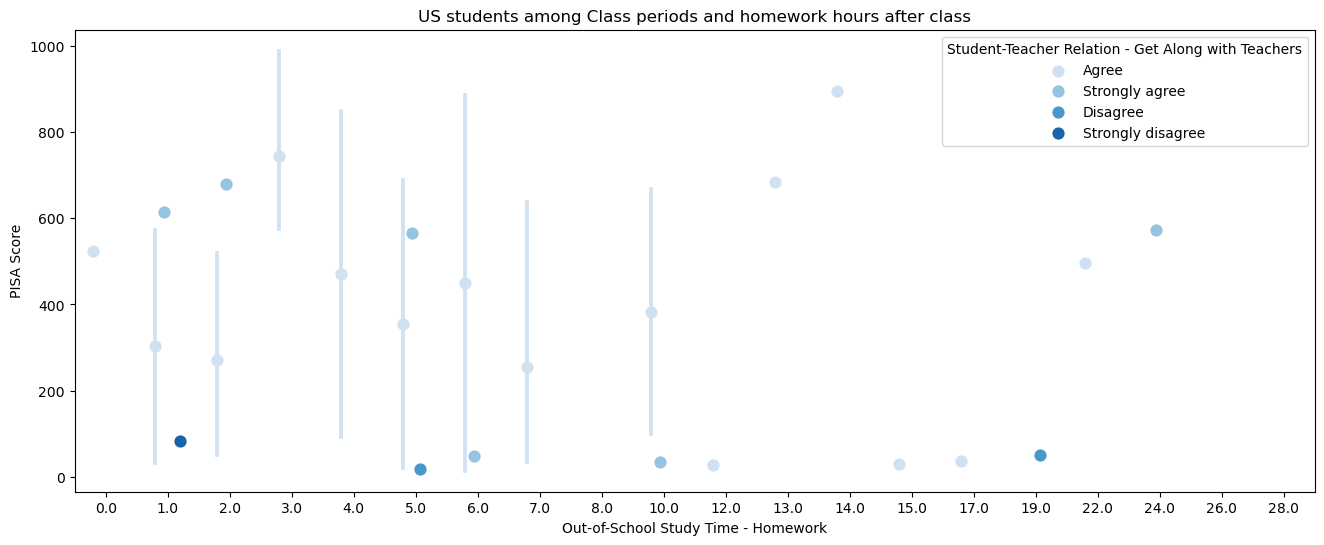

In [237]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = usstudent, hue = 'Student-Teacher Relation - Get Along with Teachers', y = 'FINAL STUDENT WEIGHT', x = 'Out-of-School Study Time - Homework',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('US students among Class periods and homework hours after class')
plt.ylabel('PISA Score')
# plt.yscale('log')
# plt.yticks([1e0, 1, 5e1, 2e2], ['0', '10', '5', '20'])
ax.set_yticklabels([],minor = True)
plt.show();

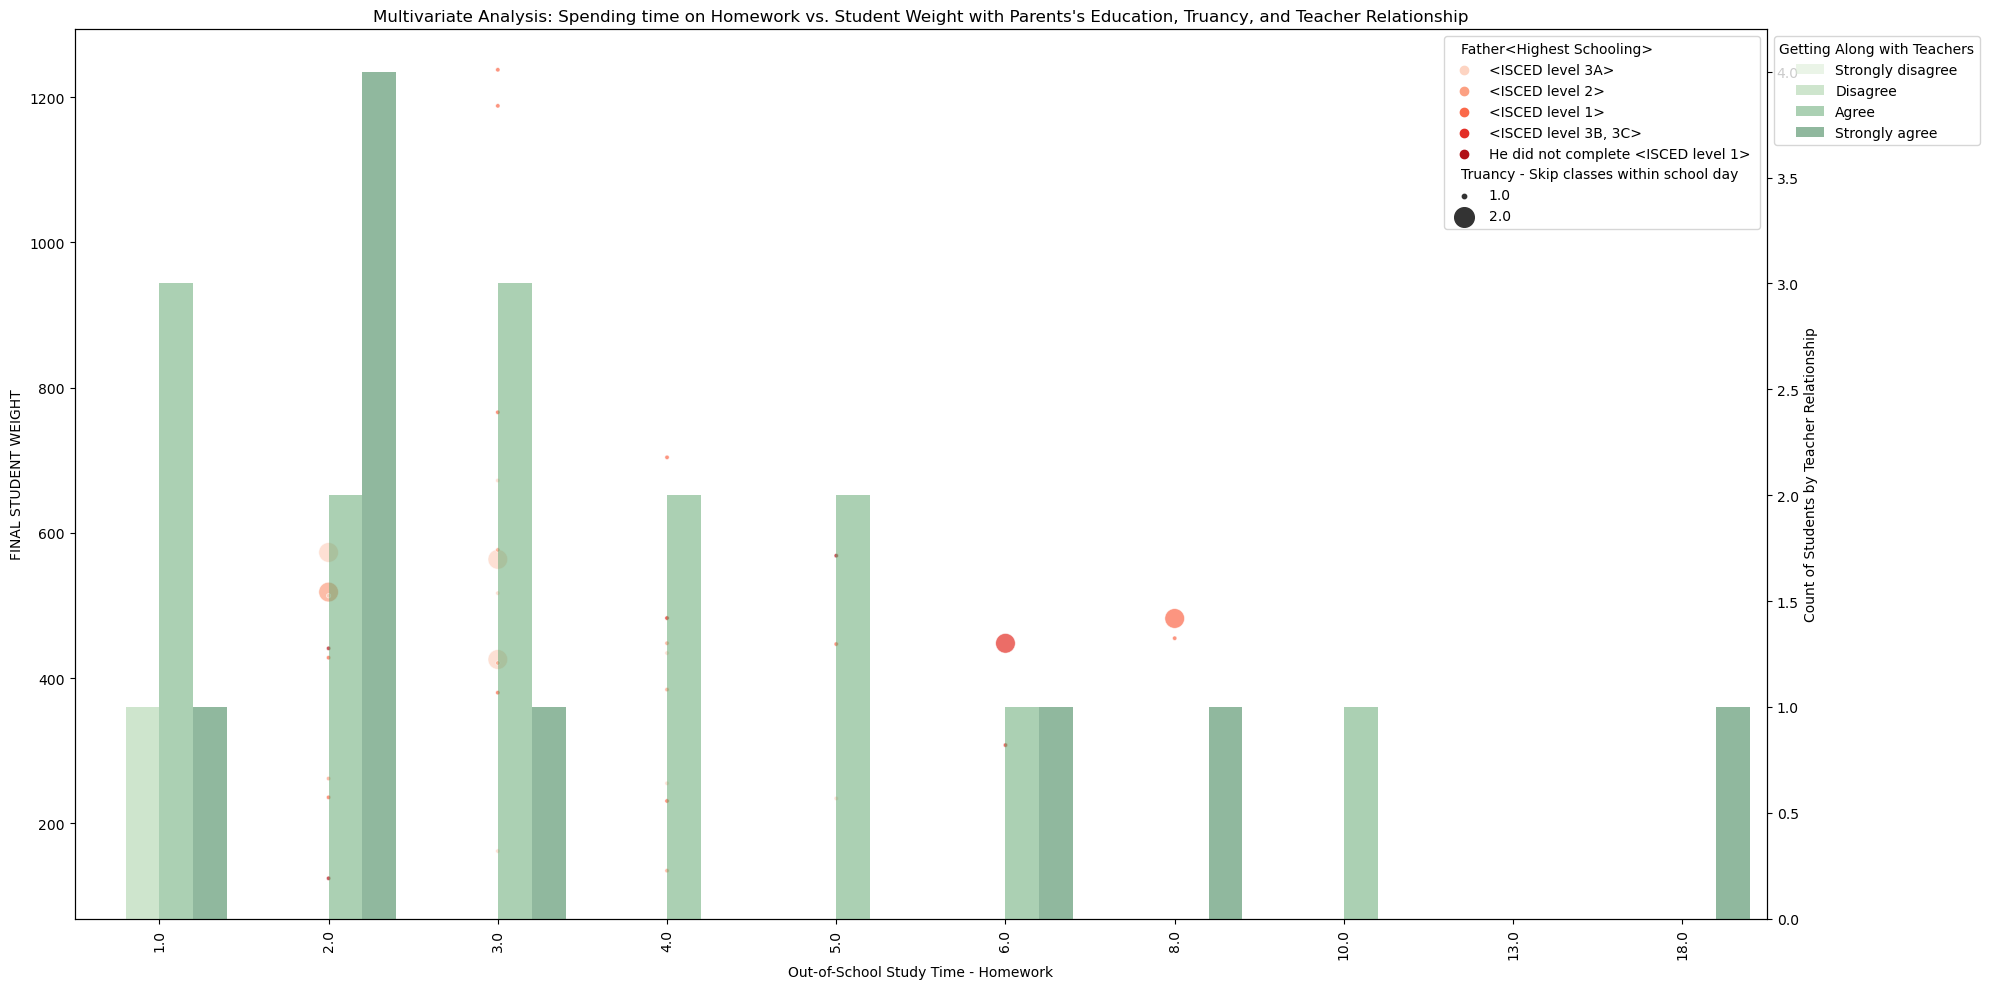

In [230]:
# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=indostudent, x='Out-of-School Study Time - Homework', y='FINAL STUDENT WEIGHT', 
                hue='Father<Highest Schooling>', size= 'Truancy - Skip classes within school day', sizes=(10, 200), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=indostudent, x='Out-of-School Study Time - Homework', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: Spending time on Homework vs. Student Weight with Parents's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

